In [147]:
# This notebook was ran under Python 3.9.10
import sys
import ROOT
from ROOT import gROOT, TCanvas, TF1, TFile, TBranch
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['STIX']})
plt.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams.update({'text.usetex':False, 'text.latex.preamble':[r'\usepackage{amsmath, newtxmath,bm}']})

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

import pandas as pd
from matplotlib.lines import Line2D


CTW = '#0047AB'#(0./255,0./255,205./255,1)
CBAB =(255./255.,140./255.,0/255.,1)
CCOMP =(107/255.,142./255.,35/255.,1)

Python 3.9.10


# Check Thesis / Paper files

In [7]:
#Loading root file Paper version

f = TFile.Open("result_files/Tracks_outputBeam15V2.root")
ErrorPa = f.Get("ErrorEstimate")
ErrTrackPa = f.Get("PerTrackError")
CurvTrackPa = f.Get("PerTrackCurv")
DisTrackPa = f.Get("DisPerTrackError")

numberMC = ErrorPa.AsMatrix(["nMC"])

UndermerPa = ErrorPa.AsMatrix(["Error_underMergeNorm"])
#UndermerPa =UndermerPa[~np.isnan(UndermerPa)]

OvermerPa = ErrorPa.AsMatrix(["Error_overMergeNorm"])
TotPa = ErrorPa.AsMatrix(["TotalErrorNorm"])
JacPa = ErrTrackPa.AsMatrix(["Jacardsingle"])
F1Pa = ErrTrackPa.AsMatrix(["Jacardaverage"])
disxPa = ErrTrackPa.AsMatrix(["disX"])
disyPa = ErrTrackPa.AsMatrix(["disY"])
diszPa = ErrTrackPa.AsMatrix(["disZ"])
diszPa = diszPa[diszPa < 180]
MClength = ErrTrackPa.AsMatrix(["MCLength"])
#CCIntlength = ErrTrackPa.AsMatrix(["CClength"])

compPa = ErrTrackPa.AsMatrix(["complex"])
alldisxPa = DisTrackPa.AsMatrix(["disx"])
alldisyPa = DisTrackPa.AsMatrix(["disy"])
alldiszPa = DisTrackPa.AsMatrix(["disz"])
#alldiszPa = alldiszPa[alldiszPa < 180]

MCRadPa = CurvTrackPa.AsMatrix(["MC_r"])
CCRadPa = CurvTrackPa.AsMatrix(["tr_r"])
MCRadDigPa2 =  CurvTrackPa.AsMatrix(["MC_E"])
MCPx    = CurvTrackPa.AsMatrix(["MC_px"])
MCPy    = CurvTrackPa.AsMatrix(["MC_py"])
MCPz    = CurvTrackPa.AsMatrix(["MC_pz"])
CCRadDrPa = CurvTrackPa.AsMatrix(["tr_E"])
CCRadsigH = CurvTrackPa.AsMatrix(["tr_a"])
CCRadsigL = CurvTrackPa.AsMatrix(["tr_b"])
CCThetaSca= CurvTrackPa.AsMatrix(["tr_theta"])


print("N events %d, N tracks %f, N points %f"%(len(TotPa), len(F1Pa), len(alldiszPa)))

/home/simon/anaconda3/envs/root_env/lib/python3.9/site-packages/ROOT/pythonization/_ttree.py:191: FutureWarning: TTree.AsMatrix is deprecated since v6.24 and will be removed in v6.26. Please use instead RDataFrame.AsNumpy.
  warnings.warn("TTree.AsMatrix is deprecated since v6.24 and will be removed in v6.26. Please use instead RDataFrame.AsNumpy.", FutureWarning)


N events 15000, N tracks 56037.000000, N points 1118682.000000


# Paper plots

## Loading files

### LOTF Beam 3, single event

In [9]:
#Loading root file paper version Evt1

# f = TFile.Open("results_tests/Tracks_outputBeam3V2.root")Old files
f = TFile.Open("result_files/LOTFAnalysis_Beam3.root")

GlobalErrB3 = f.Get("GlobalEvtError")
numberMCB3    = GlobalErrB3.AsMatrix(["nMC"])
numberRecoB3  = GlobalErrB3.AsMatrix(["nReco"])
UndermerB3    = GlobalErrB3.AsMatrix(["Error_underMergeNorm"])
OvermerB3     = GlobalErrB3.AsMatrix(["Error_overMergeNorm"])
TotB3         = GlobalErrB3.AsMatrix(["TotalErrorNorm"])


ErrMCTrackB3  = f.Get("PerMCTrackError")
F1B3          = ErrMCTrackB3.AsMatrix(["F1score"])
meanDisxB3    = ErrMCTrackB3.AsMatrix(["MeanDiffX"])
meanDisyB3    = ErrMCTrackB3.AsMatrix(["MeanDiffY"])
meanDiszB3    = ErrMCTrackB3.AsMatrix(["MeanDiffZ"])
meanDiszB3    = meanDiszB3[meanDiszB3 < 180]
MClengthB3    = ErrMCTrackB3.AsMatrix(["MCLength"])
compB3        = ErrMCTrackB3.AsMatrix(["Complex"])
CCIntlengthB3 = ErrMCTrackB3.AsMatrix(["InterLength"])

ErrRecoTrackB3  = f.Get("PerRecoTrackError")
RankB3          = ErrRecoTrackB3.AsMatrix(["Rank"])


CurvTrackB3   = f.Get("PerTrackCurv")
# KEEP BELOW FOR THE OLD FILES
# MCRadB3     = CurvTrackB3.AsMatrix(["MC_r"])
# CCRadB3     = CurvTrackB3.AsMatrix(["tr_r"])
# MCRadDigB32 =  CurvTrackB3.AsMatrix(["MC_E"])
MCPxB3      = CurvTrackB3.AsMatrix(["MC_px"])
MCPyB3      = CurvTrackB3.AsMatrix(["MC_py"])
MCPzB3      = CurvTrackB3.AsMatrix(["MC_pz"])
# CCRadDrB3   = CurvTrackB3.AsMatrix(["tr_E"])
# CCRadsigHB3 = CurvTrackB3.AsMatrix(["tr_a"])
# CCRadsigLB3 = CurvTrackB3.AsMatrix(["tr_b"])
# CCThetaSca  = CurvTrackB3.AsMatrix(["tr_theta"])

DisTrackB3    = f.Get("CoordDiffPerTrackError")
alldisxB3 = DisTrackB3.AsMatrix(["disx"])
alldisyB3 = DisTrackB3.AsMatrix(["disy"])
alldiszB3 = DisTrackB3.AsMatrix(["disz"])


print("Beam 3: N events %d, N tracks (> 5 hits) %f, N points %f"%(len(TotB3), len(F1B3), len(alldiszB3)))
print("Beam 3: N events %d, N tracks (> 5 hits) %f, N points %f"%(sum(numberMCB3), sum(numberRecoB3), len(alldiszB3)))

Beam 3: N events 15000, N tracks (> 5 hits) 50118.000000, N points 1068524.000000
Beam 3: N events 48352, N tracks (> 5 hits) 62311.000000, N points 1068524.000000


In [14]:
print(len(F1B3), len(meanDiszB3), len(meanDisyB3) )

50118 43583 50118


### LOTF Beam 15, single event

In [10]:
#Loading root file paper version Evt1

#f = TFile.Open("Results_tests/Tracks_outputBeam15V2.root")
f = TFile.Open("Result_files/LOTFAnalysis_Beam15.root")

GlobalErrB15 = f.Get("GlobalEvtError")
numberMCB15    = GlobalErrB15.AsMatrix(["nMC"])
numberRecoB15  = GlobalErrB15.AsMatrix(["nReco"])
UndermerB15    = GlobalErrB15.AsMatrix(["Error_underMergeNorm"])
OvermerB15     = GlobalErrB15.AsMatrix(["Error_overMergeNorm"])
TotB15         = GlobalErrB15.AsMatrix(["TotalErrorNorm"])


ErrMCTrackB15  = f.Get("PerMCTrackError")
F1B15          = ErrMCTrackB15.AsMatrix(["F1score"])
meanDisxB15    = ErrMCTrackB15.AsMatrix(["MeanDiffX"])
meanDisyB15    = ErrMCTrackB15.AsMatrix(["MeanDiffY"])
meanDiszB15    = ErrMCTrackB15.AsMatrix(["MeanDiffZ"])
meanDiszB15    = meanDiszB15[meanDiszB15 < 180]
MClengthB15    = ErrMCTrackB15.AsMatrix(["MCLength"])
compB15        = ErrMCTrackB15.AsMatrix(["Complex"])
CCIntlengthB15 = ErrMCTrackB15.AsMatrix(["InterLength"])

ErrRecoTrackB15  = f.Get("PerRecoTrackError")
RankB15          = ErrRecoTrackB15.AsMatrix(["Rank"])

CurvTrackB15   = f.Get("PerTrackCurv")
# KEEP BELOW FOR THE OLD FILES
# MCRadB15     = CurvTrackB15.AsMatrix(["MC_r"])
# CCRadB15     = CurvTrackB15.AsMatrix(["tr_r"])
# MCRadDigB152 =  CurvTrackB15.AsMatrix(["MC_E"])
MCPxB15      = CurvTrackB15.AsMatrix(["MC_px"])
MCPyB15      = CurvTrackB15.AsMatrix(["MC_py"])
MCPzB15      = CurvTrackB15.AsMatrix(["MC_pz"])
# CCRadDrB15   = CurvTrackB15.AsMatrix(["tr_E"])
# CCRadsigHB15 = CurvTrackB15.AsMatrix(["tr_a"])
# CCRadsigLB15 = CurvTrackB15.AsMatrix(["tr_b"])
# CCThetaSca  = CurvTrackB15.AsMatrix(["tr_theta"])

DisTrackB15    = f.Get("CoordDiffPerTrackError")
alldisxB15 = DisTrackB15.AsMatrix(["disx"])
alldisyB15 = DisTrackB15.AsMatrix(["disy"])
alldiszB15 = DisTrackB15.AsMatrix(["disz"])


print("Beam 15 N events %d, N tracks %f, N points %f"%(len(TotB15), len(F1B15), len(alldiszB15)))

Beam 15 N events 15000, N tracks 57491.000000, N points 1093772.000000


In [13]:
print(len(F1B15), len(meanDiszB15), len(meanDisyB15) )

57491 48712 57491


### LOTF Beam 3 Evt 4

In [11]:
# f = TFile.Open("Results_tests/Tracks_outputBeam3Evt4.root")\
f = TFile.Open("Result_files/LOTFAnalysis_Beam3Evt4.root")

GlobalErrB3E4 = f.Get("GlobalEvtError")
numberMCB3E4    = GlobalErrB3E4.AsMatrix(["nMC"])
numberRecoB3E4  = GlobalErrB3E4.AsMatrix(["nReco"])
UndermerB3E4    = GlobalErrB3E4.AsMatrix(["Error_underMergeNorm"])
OvermerB3E4     = GlobalErrB3E4.AsMatrix(["Error_overMergeNorm"])
TotB3E4         = GlobalErrB3E4.AsMatrix(["TotalErrorNorm"])


ErrMCTrackB3E4  = f.Get("PerMCTrackError")
F1B3E4          = ErrMCTrackB3E4.AsMatrix(["F1score"])
meanDisxB3E4    = ErrMCTrackB3E4.AsMatrix(["MeanDiffX"])
meanDisyB3E4    = ErrMCTrackB3E4.AsMatrix(["MeanDiffY"])
meanDiszB3E4    = ErrMCTrackB3E4.AsMatrix(["MeanDiffZ"])
meanDiszB3E4    = meanDiszB3E4[meanDiszB3E4 < 180]
MClengthB3E4    = ErrMCTrackB3E4.AsMatrix(["MCLength"])
compB3E4        = ErrMCTrackB3E4.AsMatrix(["Complex"])
CCIntlengthB3E4 = ErrMCTrackB3E4.AsMatrix(["RecoLength"])

ErrRecoTrackB3E4  = f.Get("PerRecoTrackError")
RankB3E4          = ErrRecoTrackB3E4.AsMatrix(["Rank"])

CurvTrackB3E4   = f.Get("PerTrackCurv")
# KEEP BELOW FOR THE OLD FILES
# MCRadB3E4     = CurvTrackB3E4.AsMatrix(["MC_r"])
# CCRadB3E4     = CurvTrackB3E4.AsMatrix(["tr_r"])
# MCRadDigB3E42 =  CurvTrackB3E4.AsMatrix(["MC_E"])
# MCPxB3E4      = CurvTrackB3E4.AsMatrix(["MC_px"])
# MCPyB3E4      = CurvTrackB3E4.AsMatrix(["MC_py"])
# MCPzB3E4      = CurvTrackB3E4.AsMatrix(["MC_pz"])
# CCRadDrB3E4   = CurvTrackB3E4.AsMatrix(["tr_E"])
# CCRadsigHB3E4 = CurvTrackB3E4.AsMatrix(["tr_a"])
# CCRadsigLB3E4 = CurvTrackB3E4.AsMatrix(["tr_b"])
# CCThetaSca  = CurvTrackB3E4.AsMatrix(["tr_theta"])

DisTrackB3E4    = f.Get("CoordDiffPerTrackError")
alldisxB3E4     = DisTrackB3E4.AsMatrix(["disx"])
alldisyB3E4     = DisTrackB3E4.AsMatrix(["disy"])
alldiszB3E4     = DisTrackB3E4.AsMatrix(["disz"])

print("Beam 3, Evt 4: N events %d, N tracks %f, N points %f"%(len(TotB3E4), len(F1B3E4), len(alldiszB3E4)))

Beam 3, Evt 4: N events 4950, N tracks 51241.000000, N points 950591.000000


50118 57491


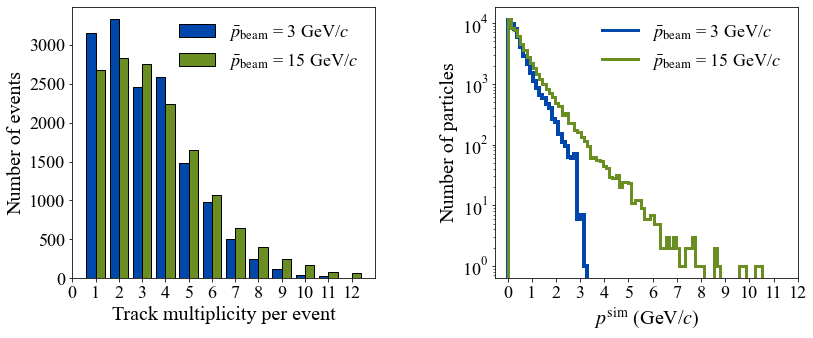

In [120]:
MCP = np.sqrt(MCPxB3**2+MCPyB3**2+MCPzB3**2)# *1e-2 *2
MCPB15 = np.sqrt(MCPxB15**2+MCPyB15**2 + MCPzB15**2)# *1e-2 *2


fig = plt.figure(figsize=(13,5))
fig.subplots_adjust(wspace=.4)
plt.subplot(1,2,1)
plt.hist([numberMCB3.flatten(),numberMCB15.flatten()], np.linspace(1,13, 13)-0.5, 
         color =[CTW, CCOMP],
         edgecolor='black', label=[r'$\bar{p}_{\rm beam}$ = 3 GeV/$c$',r'$\bar{p}_{\rm beam}$ = 15 GeV/$c$'])
# plt.hist(numberMCB15, np.linspace(1,13, 13)-0.5, color =[(255./255.,140./255.,0/255.,0.5)],
#          edgecolor='black', label=r'Beam 15 GeV/$c$')
plt.xlabel('Track multiplicity per event', fontsize = 20)
plt.ylabel('Number of events', fontsize = 20)
plt.legend(fontsize = 18, frameon = False)
#plt.yscale('log', nonposy='clip')
plt.xticks(np.arange(0, 13, 1.0))
plt.tick_params(axis='both', which='major', labelsize=18)

#plt.savefig('ntracksAll.pdf', bbox_inches='tight')

print(len(MCP), len(MCPB15))
custom_lines = [Line2D([0], [0], color=CTW, lw=3),
                Line2D([0], [0], color=CCOMP, lw=3)]
#plt.figure(figsize=(6,5))
plt.subplot(1,2,2)

#plt.hist(RMCTW, np.linspace(0,9, 30), color =[(0/255.,100/255.,255/255.,0.5)], 
#         edgecolor='black', label=r'Beam 1.5 Gev/$c$')
# plt.hist([MCP.flatten(),MCPB15.flatten()], np.arange(0, 13, 1), 
#          color =[(0./255,0./255,205./255,1),(255./255.,140./255.,0/255.,1)],
#          edgecolor='black', label=[r'Beam 3 GeV/$c$',r'Beam 15 GeV/$c$'])
plt.hist(MCP, np.linspace(0, 13,100), color =CTW, 
          label=r'Beam 3 GeV/$c$',histtype=u'step',linewidth = 4,)
plt.hist(MCPB15, np.linspace(0, 13,100), color =CCOMP,
         label=r'Beam 15 GeV/$c$',histtype=u'step',linewidth = 3,)
plt.xlabel(r'$p^{\rm sim}$ (GeV/$c$)', fontsize = 20)
plt.ylabel('Number of particles', fontsize = 20)
plt.yscale('log')
#plt.legend(fontsize = 18, frameon = False)
#plt.xscale('log', nonposx='clip')
plt.legend(custom_lines, [r'$\bar{p}_{\rm beam}$ = 3 GeV/$c$', 
                              r'$\bar{p}_{\rm beam}$ = 15 GeV/$c$'],loc='upper right', fontsize = 18, title = '',frameon=False)

plt.xticks(np.arange(0, 13, 1.0))
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0.5,12)
plt.savefig('ntrackpsimAll.pdf', bbox_inches='tight')


## F1 score Beam 3 / Beam 15 comparison

Text(0, 11000, 'Complex tracks')

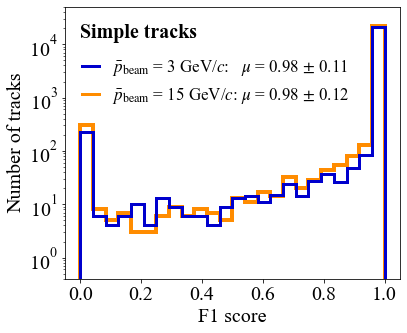

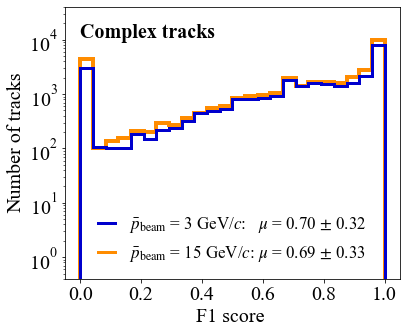

In [17]:
#F1 score Beam 3 + Beam 15

bins = np.linspace(0, 1, 25)

#plt.scatter(F1TW, )
valTW = F1B3[compB3==0]
meanTW = np.nanmean(valTW)
stdTW = np.nanstd(valTW)

valTW15 = F1B15[compB15==0]
meanTW15 = np.nanmean(valTW15)
stdTW15 = np.nanstd(valTW15)
custom_lines = [Line2D([0], [0], color=(0./255,0./255,205./255,1), lw=3),
                Line2D([0], [0], color=(255/255.,140/255.,0/255.,1), lw=3)]


plt.figure(figsize=(6,5))
plt.hist(valTW, bins, color =[CTW], \
label=r'Beam 3 GeV/$c$ - $\mu$ = %.2f $\pm$ %.2f'%(meanTW, stdTW),histtype=u'step',linewidth = 3, zorder = 5)
plt.hist(valTW15, bins, color =[CBAB], \
label=r'Beam 15 GeV/$c$ -  $\mu$ = %.2f $\pm$ %.2f'%(meanTW, stdTW),histtype=u'step',linewidth = 4)
# plt.hist(valBB, bins, color= [(255/255.,100/255.,0/255.)],\
# label=r'Babai20 - $\mu$ = %.2f, $\sigma$ = %.2f'%(meanBB, stdBB),histtype=u'step',linewidth = 3)
ax= plt.gca()
plt.yscale('log')
plt.legend(custom_lines,[r'$\bar{p}_{\rm beam}$ = 3 GeV/$c$:   $\mu$ = %.2f $\pm$ %.2f'%(meanTW, stdTW),
                        r'$\bar{p}_{\rm beam}$ = 15 GeV/$c$: $\mu$ = %.2f $\pm$ %.2f'%(meanTW15, stdTW15)],
           loc=(0.03,0.61), fontsize = 17,  frameon=False, handlelength = 1)
plt.xlabel('F1 score', fontsize = 20)
plt.ylabel('Number of tracks', fontsize = 20)
#plt.title('Simple tracks', fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.setp(ax.get_legend().get_title(), fontsize='19') # for legend title
plt.ylim(0.4,50000)
plt.xticks(np.arange(0,1.1,0.2))
plt.text(0,13000,r'Simple tracks', fontsize = 20, fontweight='bold')

# print 'n B3, number of simple tracks %d, %f'%(len(valTW), len(valTW)*1./len(F1B3))
# print 'n B15, number of simple tracks %d, %f'%(len(valTW15), len(valTW15)*1./len(F1B15))

# print 'n B3 F1 = 0, TW %d (%f)'%(np.sum(valTW== 0), np.sum(valTW== 0)/ (1.*(len(valTW== 0))))
# print 'n B3 F1 = 1, TW %d (%f)'%(np.sum(valTW== 1),np.sum(valTW== 1)/ (1.*(len(valTW== 1))))
# print 'n B15 F1 = 0, TW %d (%f)'%(np.sum(valTW15== 0), np.sum(valTW15== 0)/ (1.*(len(valTW15== 0))))
# print 'n B15 F1 = 1, TW %d (%f)'%(np.sum(valTW15== 1),np.sum(valTW15== 1)/ (1.*(len(valTW15== 1))))
#print 'Complex n F1 >0.5, TW %d, Babai %d'%(np.sum(valTW>= 0.5),np.sum(valBB >=0.5))

# plt.savefig('PaperW/F1Simp.pdf', bbox_inches='tight')



valTW = F1B3[compB3==1]
valTW15 = F1B15[compB15==1]
meanTW = np.nanmean(valTW)
stdTW = np.nanstd(valTW)
meanTW15 = np.nanmean(valTW15)
stdTW15 = np.nanstd(valTW15)

plt.figure(figsize=(6,5))

plt.hist(valTW, bins, color =[CTW], \
label=r'Beam 3 GeV/$c$ - $\mu$ = %.2f $\pm$ %.2f'%(meanTW, stdTW),histtype=u'step',linewidth = 3, zorder = 5)
plt.hist(valTW15, bins, color =[CBAB], \
label=r'Beam 15 GeV/$c$ -  $\mu$ = %.2f $\pm$ %.2f'%(meanTW, stdTW),histtype=u'step',linewidth = 4)
ax =plt.gca()


plt.yscale('log')
plt.legend(custom_lines,[r'$\bar{p}_{\rm beam}$ = 3 GeV/$c$:   $\mu$ = %.2f $\pm$ %.2f'%(meanTW, stdTW),
                        r'$\bar{p}_{\rm beam}$ = 15 GeV/$c$: $\mu$ = %.2f $\pm$ %.2f'%(meanTW15, stdTW15)],
                      loc='lower center', fontsize = 17,  frameon=False, handlelength = 1)
plt.xlabel('F1 score ', fontsize = 20)
plt.ylabel('Number of tracks', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.setp(ax.get_legend().get_title(), fontsize='19') # for legend title
plt.ylim(0.4,40000)
plt.xticks(np.arange(0,1.1,0.2))
#plt.title('Complex tracks', fontsize = 20)
plt.text(0,11000,r'Complex tracks', fontsize = 20, fontweight='bold')


# print 'n B3, number of complex tracks %d, %f'%(len(valTW), len(valTW)*1./len(F1B3))
# print 'n B15, number of complex tracks %d, %f'%(len(valTW15), len(valTW15)*1./len(F1B15))
# print 'n B3 F1 = 0, TW %d (%f)'%(np.sum(valTW== 0), np.sum(valTW== 0)/ (1.*(len(valTW))))
# print 'n B3 F1 = 1, TW %d (%f)'%(np.sum(valTW== 1),np.sum(valTW== 1)/ (1.*(len(valTW))))
# print 'n B15 F1 = 0, TW %d (%f)'%(np.sum(valTW15== 0), np.sum(valTW15== 0)/ (1.*(len(valTW15))))
# print 'n B15 F1 = 1, TW %d (%f)'%(np.sum(valTW15== 1),np.sum(valTW15== 1)/ (1.*(len(valTW15))))
# print 'n B3  F1 > 0.67, TW %d (%f)'%(np.sum(valTW>= 0.67), np.sum(valTW>= 0.67)/ (1.*(len(valTW))))
# print 'n B15 F1 > 0.67, TW %d (%f)'%(np.sum(valTW15>= .67),np.sum(valTW15>= 0.67)/ (1.*(len(valTW15))))

#plt.savefig('PaperW/F1Comp.pdf', bbox_inches='tight')


## 2D histogram of recovered particle transverse momentum

105084
105084
105084


/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in divide
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in divide
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in divide
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in divide
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in divide
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less


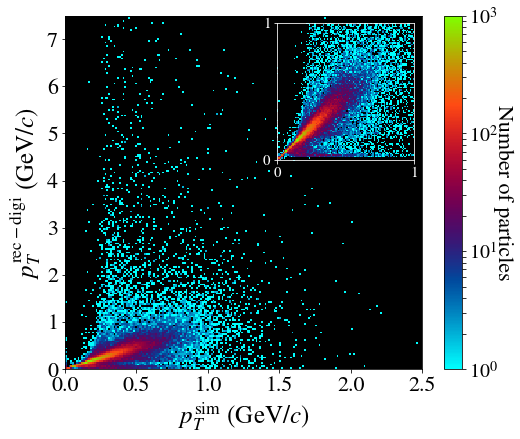

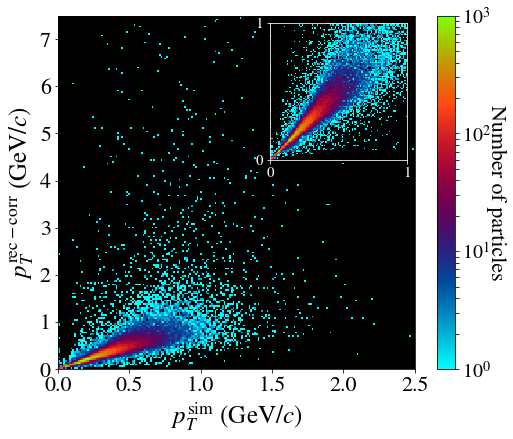

In [28]:
# 2D Hist PT

import matplotlib.colors
import numpy as np

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


cmap = plt.cm.rainbow_r
cmaplist = [cmap(i) for i in range(cmap.N)]

for i in range(len(cmaplist)):
    cmaplist[i] = (1-cmaplist[i][0], 1-cmaplist[i][1],1-cmaplist[i][2], 1.)


cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

MClengthall = np.concatenate((MClengthB3,MClengthB15))
print len(MClengthall)
F1all = np.concatenate((F1B3,F1B15))

MCPt = np.sqrt(MCPxB3**2+MCPyB3**2)# *1e-2 *2
MCPt15 = np.sqrt(MCPxB15**2+MCPyB15**2)# *1e-2 *2
MCPtall = np.concatenate((MCPt,MCPt15))
print len(MCPtall)

CCPtdig = 0.3 * 1./MCRadDigB32 *1e-2 *2
CCPtrec = 0.3 * 1./CCRadB3 *1e-2 *2
CCPtdri= 0.3 * 1./CCRadDrB3 *1e-2 *2
CCPtdig15 = 0.3 * 1./MCRadDigB152 *1e-2 *2
CCPtrec15 = 0.3 * 1./CCRadB15 *1e-2 *2
CCPtdri15= 0.3 * 1./CCRadDrB15 *1e-2 *2

CCPtdigall = np.concatenate((CCPtdig,CCPtdig15))
CCPtrecall = np.concatenate((CCPtrec,CCPtrec15))
CCPtdriall = np.concatenate((CCPtdri,CCPtdri15))

print len(CCPtrecall)


cond1 = (MCPtall <np.inf) & (MCPtall>0.)  & (MClengthall >15) & (F1all >= 0.95)& (CCPtrecall<np.inf)
MCPtall =MCPtall[cond1]
CCPtdigall=CCPtdigall[cond1]
CCPtrecall=CCPtrecall[cond1]
CCPtdriall=CCPtdriall[cond1]

binsout = 200
binsint = 100
cond2 = (~np.isnan(CCPtdigall)) & (CCPtdigall < 50) & (CCPtdigall > 0)

fig =plt.figure(figsize = (8,6.5))
ax = plt.gca()
h  = ax.hist2d(MCPtall[cond2], CCPtdigall[cond2], bins=[np.linspace(0,2.5,binsout),np.linspace(0,7.5,binsout)],
                                                        norm=matplotlib.colors.LogNorm(), vmin =1,vmax=1000, cmap=cmap)
ax.set_facecolor((.0, 0., 0.))

axins = inset_axes(ax, 1.9,1.9 , loc='upper right', bbox_to_anchor=(0.74, 0.875),bbox_transform=ax.figure.transFigure)
#box, c1, c2 = mark_inset(ax, axins, loc1=3, loc2=4,  ec="0.1")
for axis in ['top','bottom','left','right']:
    axins.spines[axis].set_color('w')
axins.set_facecolor((.0, 0., 0.))
axins.xaxis.label.set_color('white')
axins.yaxis.label.set_color('white')
axins.tick_params(axis='both', which='major', labelsize=15, colors = 'w')
axins.hist2d(MCPtall[cond2], CCPtdigall[cond2], bins=np.linspace(0,1,binsint),norm=matplotlib.colors.LogNorm(), cmap=cmap)
axins.set_xticks([0,1])
axins.set_yticks([0,1])
ax.set_xlabel(r'$p_{T}^{\rm sim}$ (GeV/$c$)', fontsize = 25)
ax.set_ylabel(r'$p_{T}^{\rm rec-digi}$ (GeV/$c$)', fontsize = 25)
ax.tick_params(axis='both', which='major', labelsize=22)
cb =fig.colorbar(h[3],ax = ax)
cb.set_label('Number of particles', rotation=270, fontsize = 22,labelpad=15)
cb.ax.tick_params(labelsize=20) 
plt.savefig('PaperW/Momentumdigi.pdf', bbox_inches='tight', dpi = 300)



cond2 = (~np.isnan(CCPtrecall)) & (CCPtrecall < 50) & (CCPtrecall > 0)
fig =plt.figure(figsize = (8,6.5))
ax = plt.gca()
h  = ax.hist2d(MCPtall[cond2], CCPtrecall[cond2], bins=[np.linspace(0,2.5,binsout),np.linspace(0,7.5,binsout)],
                                                        norm=matplotlib.colors.LogNorm(), vmin =1,vmax=1000,cmap=cmap)
ax.set_facecolor((.0, 0., 0.))

axins = inset_axes(ax, 1.9,1.9 , loc='upper right', bbox_to_anchor=(0.74, 0.875),bbox_transform=ax.figure.transFigure)
#box, c1, c2 = mark_inset(ax, axins, loc1=3, loc2=4,  ec="0.1")
for axis in ['top','bottom','left','right']:
    axins.spines[axis].set_color('w')
axins.set_facecolor((.0, 0., 0.))
axins.xaxis.label.set_color('white')
axins.yaxis.label.set_color('white')
axins.tick_params(axis='both', which='major', labelsize=15, colors = 'w')
axins.hist2d(MCPtall[cond2], CCPtrecall[cond2], bins=np.linspace(0,1,binsint),norm=matplotlib.colors.LogNorm(), cmap=cmap)
axins.set_xticks([0,1])
axins.set_yticks([0,1])


ax.set_xlabel(r'$p_{T}^{\rm sim}$ (GeV/$c$)', fontsize = 25)
ax.set_ylabel(r'$p_{T}^{\rm rec-corr}$ (GeV/$c$)', fontsize = 25)
ax.tick_params(axis='both', which='major', labelsize=22)
#plt.ylim(-0.5,5)
#plt.xlim(-0.1,5)

cb =fig.colorbar(h[3],ax = ax)
cb.set_label('Number of particles', rotation=270, fontsize = 22,labelpad=15)
cb.ax.tick_params(labelsize=20) 
plt.savefig('PaperW/Momentumrec.pdf', bbox_inches='tight', dpi = 300)



## 1D particle transverse momentum recovered

105084
105084
0.39004696383
0.528137101425
0.590590755541
0.756200049436


/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in divide
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in divide
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in divide
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in divide
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in divide
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in less
/home/Simon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid 

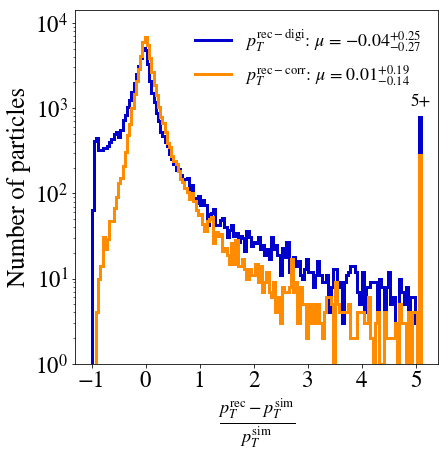

In [30]:
#1D Pt

import matplotlib.colors
import numpy as np
cmap = plt.cm.rainbow_r
cmaplist = [cmap(i) for i in range(cmap.N)]
for i in range(len(cmaplist)):
    cmaplist[i] = (1-cmaplist[i][0], 1-cmaplist[i][1],1-cmaplist[i][2], 1.)
    #cmaplist[i][1] = 1-cmaplist[i][1]
    #cmaplist[i][2] = 1-cmaplist[i][2]

#print cmaplist
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

MClengthall = np.concatenate((MClengthB3,MClengthB15))
print len(MClengthall)
F1all = np.concatenate((F1B3,F1B15))

MCPt = np.sqrt(MCPxB3**2+MCPyB3**2)# *1e-2 *2
MCPt15 = np.sqrt(MCPxB15**2+MCPyB15**2)# *1e-2 *2
MCPtall = np.concatenate((MCPt,MCPt15))
print len(MCPtall)

CCPtdig = 0.3 * 1./MCRadDigB32 *1e-2 *2
CCPtrec = 0.3 * 1./CCRadB3 *1e-2 *2
CCPtdri= 0.3 * 1./CCRadDrB3 *1e-2 *2
CCPtdig15 = 0.3 * 1./MCRadDigB152 *1e-2 *2
CCPtrec15 = 0.3 * 1./CCRadB15 *1e-2 *2
CCPtdri15= 0.3 * 1./CCRadDrB15 *1e-2 *2

CCPtdigall = np.concatenate((CCPtdig,CCPtdig15))
CCPtrecall = np.concatenate((CCPtrec,CCPtrec15))
CCPtdriall = np.concatenate((CCPtdri,CCPtdri15))


cond1 =  (MCPtall <np.inf) & (MCPtall>0.)  & (MClengthall >15) & (F1all >= 0.95)& (CCPtrecall<np.inf)

cond2 =  (MCPtall>0.)  & (MClengthall >=15)  & (F1all >= 0.95 ) & (CCPtrecall<np.inf)

MCPtall1 =MCPtall[cond1]
CCPtdigall1=CCPtdigall[cond1]
CCPtrecall1=CCPtrecall[cond1]
CCPtdriall1=CCPtdriall[cond1]

MCPtall2 =MCPtall[cond2]
CCPtdigall2=CCPtdigall[cond2]
CCPtrecall2=CCPtrecall[cond2]
CCPtdriall2=CCPtdriall[cond2]

binsout = 100
binsint = 100
# cond2 = (~np.isnan(CCPtdigall)) & (CCPtdigall < 50) & (CCPtdigall > 0)


f1lim = 1.
f1lim1 = 1.1
f1lim2 = 0.66
valTWcond1 = (CCPtdigall1 - MCPtall1)/MCPtall1
valTWcond2 = (CCPtrecall1 - MCPtall1)/MCPtall1

liminf = -1
limoff = 5.1

fig =plt.figure(figsize = (6.5,6.5))

bins = np.linspace(liminf, limoff, 150)

meanTWcond1 = round(np.nanmedian(valTWcond1),2)+0
std84TWcond1 = np.nanpercentile(valTWcond1,84) - meanTWcond1 # gives the 95th percentile
std16TWcond1 = meanTWcond1 - np.nanpercentile(valTWcond1,16) # gives the 95th percentile

meanTWcond2 = round(np.nanmedian(valTWcond2),2)+0
std84TWcond2 = np.nanpercentile(valTWcond2,84) - meanTWcond2 # gives the 95th percentile
std16TWcond2 = meanTWcond2 - np.nanpercentile(valTWcond2,16) # gives the 95th percentilestd84TWbad = np.nanpercentile(valTW2,84) - meanTWbad # gives the 95th percentile


plt.hist(np.clip(valTWcond1,bins[0], bins[-1]), bins, color =[CTW], \
label=r'$p_{T}^{\rm X}$ = $p_{T}^{\rm recMed}$ ',histtype=u'step',linewidth = 3)
plt.hist(np.clip(valTWcond2,bins[0], bins[-1]), bins, color =[CBAB], \
label=r'$p_{T}^{\rm X}$ = $p_{T}^{\rm recMed}$ ',histtype=u'step',linewidth = 3)




ax = plt.gca()
ax.set_yscale('log', nonposy='clip')
ax.set_ylabel('Number of particles', fontsize = 25)
#ax.set_xlabel(r'$\frac{p_{T}^{\rm rec} - p_{T}^{\rm sim}}{p_{T}^{\rm sim}}$', fontsize = 25)
ax.set_xlabel(r'$\frac{p_T^{\rm rec}-p_T^{\rm sim}}{p_T^{\rm sim}}$', fontsize = 26)

ax.tick_params(axis='both', which='major', labelsize=23)
#plt.text(0.03,0.900, r'$p_{T}\ <\ 0.1$ GeV/$c$', fontsize  = 20,transform=plt.gca().transAxes)
# plt.text(0.6,0.900, r'$\mu$ = %.2f$^{+%.2f}_{-%.2f}$'%(meanTWbad, std84TWbad, std16TWbad), fontsize  = 17,
#          transform=plt.gca().transAxes, color =(0/255.,50/255.,185/255.) )
# plt.text(0.6,0.800, r'$\mu$ = %.2f$^{+%.2f}_{-%.2f}$'%(meanTW, std84TW, std16TW), fontsize  = 17,
#          transform=plt.gca().transAxes, color = CTW)

# plt.text(0.6,0.700, r'$\mu$ = %.2f$^{+%.2f}_{-%.2f}$'%(meanTW3, std84TW3, std16TW3), fontsize  = 17,
#          transform=plt.gca().transAxes, color = CBAB)

#plt.legend(loc = 'upper left', fontsize = 17, frameon=False)

plt.text(0.925,0.73, '5+', fontsize  = 17,  transform=plt.gca().transAxes, color = 'k')

custom_lines = [Line2D([0], [0], color=(0./255,0./255,205./255,1), lw=3),
                Line2D([0], [0], color=(255/255.,140/255.,0/255.,1), lw=3)]


#plt.yscale('log', nonposy='clip')
plt.legend(custom_lines,[r'$p_{T}^{\rm rec-digi}$: $\mu$ = $%.2f^{+%.2f}_{-%.2f}$'%(meanTWcond1, std84TWcond1, std16TWcond1),
                         r'$p_{T}^{\rm rec-corr}$: $\mu$ = $%.2f^{+%.2f}_{-%.2f}$'%(meanTWcond2, std84TWcond2, std16TWcond2)],
                      loc='upper right', fontsize = 18,  frameon=False)
#plt.axvline(7.0,color='k')
plt.ylim(1,14000)
plt.xticks(np.arange(-1,6,1))
#plt.savefig('Momen_reldiff.pdf', bbox_inches='tight')

print 1.*np.sum(abs(valTWcond1)<0.1)/len(valTWcond1)
print 1.*np.sum(abs(valTWcond2)<0.1)/len(valTWcond2)

print 1.*np.sum(abs(valTWcond1)<0.2)/len(valTWcond1)
print 1.*np.sum(abs(valTWcond2)<0.2)/len(valTWcond2)



plt.savefig('PaperW/Momen_reldiff.pdf', bbox_inches='tight')

## Z reconstruction analysis

In [ ]:
# Z plot

ftsize =13

allzTW = np.concatenate((alldiszB3, alldiszB15))
allF1 = np.concatenate((F1B3, F1B15))
allCInt = np.concatenate((CCIntlengthB3, CCIntlengthB15))

# F1ZList = []
CCInter = np.array(allCInt.astype('int32')).flatten()

# for trk in range(len(allF1)):
#     if(allF1[trk] == 1):
#         offset = sum(CCInter[:trk])
#         nval = CCInter[trk]
#        # print nval
#         F1ZList.append(allzTW[offset:offset+nval])

# outZ = np.concatenate(F1ZList).ravel()
 
name = 'PaperW/zPaper'
xlabe =  r'z$_{\rm rec} - $z$_{\rm sim}$ [cm]'
binss = [np.linspace(-6, 6, 50),np.linspace(-6, 6, 50),np.linspace(-150, 150, 50)]
custom_lines = [Line2D([0,1], [0,0], color=(0./255,0./255,205./255,1), lw=3),
                Line2D([0,1], [0,0], color=(255/255.,140/255.,0/255.,1), lw=3)]

valAll = allzTW[allzTW<=180]
meanAll = np.nanmedian(valAll)
stdAll = np.nanstd(valAll)
std84All = np.percentile(valAll,84) - meanAll # gives the 95th percentile
std16All = meanAll - np.percentile(valAll,16) # gives the 95th percentile

valF1 = outZ[outZ<=180]
meanF1 = np.nanmedian(valF1)
stdF1 = np.nanstd(valF1)
std84F1 = np.percentile(valF1,84) - meanAll # gives the 95th percentile
std16F1 = meanAll - np.percentile(valF1,16) # gives the 95th percentile



plt.figure(figsize=(6,5))
plt.hist(valAll, np.linspace(-150, 150, 50), color =[CTW], histtype=u'step',linewidth = 3)
plt.hist(valF1, np.linspace(-150, 150, 50), color =[CBAB], histtype=u'step',linewidth = 3)

ax = plt.gca()

plt.legend(custom_lines, ['All: $\mu = %.2f^{+%.2f}_{-%.2f}$ cm'%(meanAll, std84All,std16All),
                          'F1 = 1: $\mu = %.2f^{+%.2f}_{-%.2f}$ cm'%(meanF1, std84F1,std16F1)],
               loc='lower center', fontsize = 15, title = '',frameon=False, handlelength=1)
plt.setp(ax.get_legend().get_title(), fontsize='13') # for legend title

plt.xlabel(xlabe, fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.yscale('log', nonposy='clip')
plt.xticks([-150,-100,-50,0,50,100,150])
#plt.savefig(name+'.pdf', bbox_inches='tight')
    ##plt.axvline(-20)

print sum(abs(valAll)<3)/(1.*len(valAll))
print sum(abs(valF1)<3)/(1.*len(valF1))
print sum(abs(valAll)<10)/(1.*len(valAll))
print sum(abs(valF1)<10)/(1.*len(valF1))

## Comparising results for 1 and 4 concatenated events

n Evt1 F1 = 0, TW 2005 (0.040879)
n Evt1 F1 = 1, TW 26080 (0.531735)
n Evt1 F1 > 0.67, TW 40533 (0.826411)
n Evt4 F1 = 0, TW 3426 (0.069338)
n Evt4 F1 = 1, TW 13669 (0.276644)
n Evt4 F1 > 0.67, TW 32041 (0.648472)


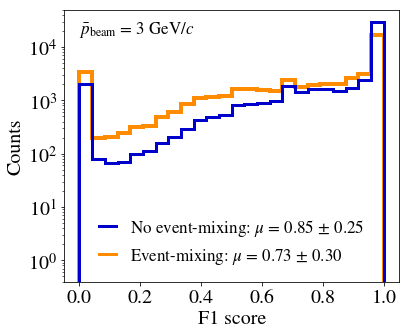

In [32]:
# 4 evts comparison


bins = np.linspace(0, 1, 25)

#plt.scatter(F1TW, )
meanF1Evt1 = np.nanmean(F1B3)
stdF1Evt1 = np.nanstd(F1B3)
meanF1Evt4 = np.nanmean(F1B3E4[:len(F1B3)])
stdF1Evt4 = np.nanstd(F1B3E4[:len(F1B3)])
custom_lines = [Line2D([0], [0], color=(0./255,0./255,205./255,1), lw=3),
                Line2D([0], [0], color=(255/255.,140/255.,0/255.,1), lw=3)]


plt.figure(figsize=(6,5))
plt.hist(F1B3, bins, color =[CTW], \
histtype=u'step',linewidth = 3, zorder = 5)
plt.hist(F1B3E4[:len(F1B3)], bins, color =[CBAB], \
histtype=u'step',linewidth = 4)
# plt.hist(valBB, bins, color= [(255/255.,100/255.,0/255.)],\
# label=r'Babai20 - $\mu$ = %.2f, $\sigma$ = %.2f'%(meanBB, stdBB),histtype=u'step',linewidth = 3)
ax= plt.gca()
plt.yscale('log', nonposy='clip')
plt.legend(custom_lines,[r'No event-mixing: $\mu$ = %.2f $\pm$ %.2f'%(meanF1Evt1, stdF1Evt1),
                       r'Event-mixing: $\mu$ = %.2f $\pm$ %.2f'%(meanF1Evt4, stdF1Evt4)],
          loc='lower center', fontsize = 17,  frameon=False, handlelength = 1)
plt.xlabel('F1 score', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
#plt.title('Simple tracks', fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=20)
#plt.setp(ax.get_legend().get_title(), fontsize='19') # for legend title
plt.ylim(0.4,50000)
plt.xticks(np.arange(0,1.1,0.2))
plt.text(0.0, 18000, r'$\bar{p}_{\rm beam}$ = 3 GeV/$c$',fontsize = 17)
# print 'n B3, number of simple tracks %d, %f'%(len(valTW), len(valTW)*1./len(F1TW))
# print 'n B15, number of simple tracks %d, %f'%(len(valTW15), len(valTW15)*1./len(F1TWB15))

print 'n Evt1 F1 = 0, TW %d (%f)'%(np.sum(F1B3== 0), np.sum(F1B3== 0)/ (1.*(len(F1B3))))
print 'n Evt1 F1 = 1, TW %d (%f)'%(np.sum(F1B3== 1),np.sum(F1B3== 1)/ (1.*(len(F1B3))))
print 'n Evt1 F1 > 0.67, TW %d (%f)'%(np.sum(F1B3>= 0.67), np.sum(F1B3>= 0.67)/ (1.*(len(F1B3))))
print 'n Evt4 F1 = 0, TW %d (%f)'%(np.sum(F1B3E4== 0), np.sum(F1B3E4== 0)/ (1.*(len(F1B3E4))))
print 'n Evt4 F1 = 1, TW %d (%f)'%(np.sum(F1B3E4== 1),np.sum(F1B3E4== 1)/ (1.*(len(F1B3E4))))
print 'n Evt4 F1 > 0.67, TW %d (%f)'%(np.sum(F1B3E4>= 0.67), np.sum(F1B3E4>= 0.67)/ (1.*(len(F1B3E4))))
#print 'Complex n F1 >0.5, TW %d, Babai %d'%(np.sum(valTW>= 0.5),np.sum(valBB >=0.5))

plt.savefig('PaperW/F1Evtbatch.pdf', bbox_inches='tight')


## Timing analysis

In [38]:
from scipy.stats import binned_statistic
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

timeB15evt1 = pd.read_csv('Result_files/Timeperevent_Beam15.csv', engine='python')  
timeB3evt1 = pd.read_csv('Result_files/Timeperevent_Beam3.csv', engine='python')  
#timeB15evt4 = pd.read_csv('Results_tests/TimepereventB15evt4.csv')  
timeB3evt4 = pd.read_csv('Result_files/Timeperevent_Beam3Evt4.csv', engine='python')  
print(timeB15evt1['fittime'])

0        0.000018
1        0.000157
2        0.000006
3        0.000151
4        0.000003
           ...   
14995    0.000322
14996    0.000187
14997    0.000070
14998    0.000007
14999    0.000006
Name: fittime, Length: 15000, dtype: float64


0
34950
424
0.002275216007272727
Hits per total times  67849.41981541105
Hits per total times, plateau 124345.44724637807
Trks per total times  3113.633944721637
Means hits in 30 000 events  91.94116666666666
275.05454545454546 91.37293333333334
0.9062626262626262
N hits per track 21.571428571428573
179523


(1e-06, 0.015)

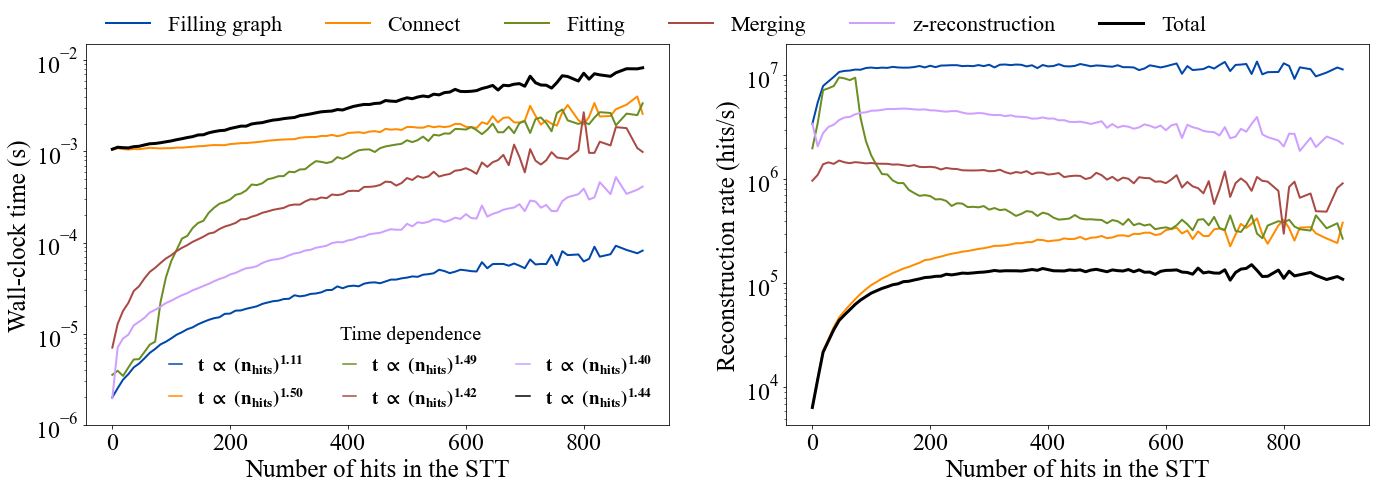

In [447]:
lw = 3

col = 'hits'
allhits = np.concatenate((timeB15evt1[col],timeB3evt1[col],timeB3evt4[col]))

col = 'trks'
alltrks = np.concatenate((timeB15evt1[col],timeB3evt1[col],timeB3evt4[col]))

col = 'filltime'
allfilltime = np.concatenate((timeB15evt1[col],timeB3evt1[col],timeB3evt4[col]))

col = 'contime'
allcontime = np.concatenate((timeB15evt1[col],timeB3evt1[col],timeB3evt4[col]))

col = 'fittime'
allfittime = np.concatenate((timeB15evt1[col],timeB3evt1[col],timeB3evt4[col]))

col = 'mergtime'
allmergtime = np.concatenate((timeB15evt1[col],timeB3evt1[col],timeB3evt4[col]))

col = 'ztime'
allztime = np.concatenate((timeB15evt1[col],timeB3evt1[col],timeB3evt4[col]))
print(sum(allmergtime>0.5))
print(len(allmergtime))
tottime = allfilltime + allcontime + allfittime + allmergtime +allztime
print(sum(allhits>500))

print(np.mean(tottime[30000:]))

bins = np.linspace(0,900,100)
bins = np.append(bins,1000)
# bins = np.append(bins,1200)
# print allhits[allhits>800], tottime[allhits>800]
# print bins
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (23,7))
# bmap = brewer2mpl.get_map('Dark2', 'Qualitative', 5)
# colors = bmap.mpl_colors

ax1.set_yscale('log')
ax2.set_yscale('log')



bin_means, bin_edges, binnumber  = binned_statistic(allhits, allfilltime, statistic=np.median, bins = bins)
bins =bin_edges
nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
ax1.plot(bins[:-1][~nans], bin_means[~nans],  color=CTW ,marker = '', lw=lw-1,      label='Filling graph')
# ax2.plot(bins[:-1][~nans], bins[:-1][~nans]*1/bin_means[~nans],color="blue",marker="o")
# ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)
bin_means, bin_edges, binnumber  = binned_statistic(allhits, allcontime, statistic=np.median, bins = bins)
# nans, x= nan_helper(bin_means)
# ax[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
ax1.plot(bins[:-1][~nans], bin_means[~nans],   color=CBAB, marker = '',lw=lw-1,      label='Connect')

bin_means, bin_edges, binnumber  = binned_statistic(allhits, allfittime, statistic=np.median, bins = bins)
# nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
ax1.plot(bins[:-1][~nans], bin_means[~nans],   color=CCOMP, marker = '',lw=lw-1,      label='Fitting')

bin_means, bin_edges, binnumber  = binned_statistic(allhits, allmergtime, statistic=np.median, bins = bins)
# nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
ax1.plot(bins[:-1][~nans], bin_means[~nans],   color='#AA4A44', marker = '',lw=lw-1,      label='Merging')

bin_means, bin_edges, binnumber  = binned_statistic(allhits, allztime, statistic=np.median, bins = bins)
# nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
ax1.plot(bins[:-1][~nans], bin_means[~nans],   color='#CF9FFF', marker = '',lw=lw-1,      label='z-reconstruction')

bin_means, bin_edges, binnumber  = binned_statistic(allhits, tottime, statistic=np.nanmedian, bins = bins)
#print binnumber
#print bin_means
# nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
ax1.plot(bins[:-1][~nans], bin_means[~nans],   color='k', marker = '', lw=lw,      label='Total')

ax1.tick_params(axis='both', which='major', labelsize=24)
ax1.set_ylabel('Wall-clock time (s)', fontsize = 25)
ax1.set_xlabel('Number of hits in the STT', fontsize = 25)

print('Hits per total times ', np.mean(allhits/tottime))
print('Hits per total times, plateau', np.mean(allhits[allhits>200]/tottime[allhits>200]))

print('Trks per total times ',np.mean(alltrks/tottime))
print('Means hits in 30 000 events ',np.mean(allhits[:30000]))
print(np.mean(timeB3evt4['hits']) , np.mean(timeB3evt1['hits']) ) 
print(1.*sum(timeB3evt4['hits']<470)/ len(timeB3evt4['hits']))
print('N hits per track', np.median(allhits/alltrks))
print(np.sum(alltrks))

# plt.text(900, 8e-5, r'$\propto$ $n_{\rm hits}^{1.52}$', color = 'b', fontsize = 20)


bin_means, bin_edges, binnumber  = binned_statistic(allhits, 1.*allhits/allfilltime,  statistic=np.median, bins = bins)
bins =bin_edges
nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
ax2.plot(bins[:-1][~nans], bin_means[~nans],  color=CTW ,marker = '', lw=lw-1,      label='Filling graph')
# ax2.plot(bins[:-1][~nans], bins[:-1][~nans]*1/bin_means[~nans],color="blue",marker="o")
# ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)

bin_means, bin_edges, binnumber  = binned_statistic(allhits,1.*allhits/allcontime,  statistic=np.median, bins = bins)
# nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
ax2.plot(bins[:-1][~nans], bin_means[~nans],   color=CBAB, marker = '',lw=lw-1,      label='Connect')

bin_means, bin_edges, binnumber  = binned_statistic(allhits,1.*allhits/allfittime, statistic=np.median, bins = bins)
# nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
ax2.plot(bins[:-1][~nans], bin_means[~nans],   color=CCOMP, marker = '',lw=lw-1,      label='Fitting')

bin_means, bin_edges, binnumber  = binned_statistic(allhits,1.*allhits/allmergtime,  statistic=np.median, bins = bins)
# nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
ax2.plot(bins[:-1][~nans], bin_means[~nans],   color='#AA4A44', marker = '',lw=lw-1,      label='Merging')

bin_means, bin_edges, binnumber  = binned_statistic(allhits,1.*allhits/allztime, statistic=np.median, bins = bins)
# nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
ax2.plot(bins[:-1][~nans], bin_means[~nans],   color='#CF9FFF', marker = '',lw=lw-1,      label='z-reconstruction')

bin_means, bin_edges, binnumber  = binned_statistic(allhits,1.*allhits/tottime,  statistic=np.nanmedian, bins = bins)
#print binnumber
#print bin_means
# nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
ax2.plot(bins[:-1][~nans], bin_means[~nans],   color='k', marker = '', lw=lw,      label='Total')
ax2.tick_params(axis='both', which='major', labelsize=24)
ax2.set_ylabel('Reconstruction rate (hits/s)', fontsize = 25)
ax2.set_xlabel('Number of hits in the STT', fontsize = 25)



# ax1.text(450, 1.5e-5, r'Time dependance', color = 'k', fontsize = 20)

# ax1.text(750, 2e-6, r'$\mathbf{t}$ $\mathbf{\propto}$ $\mathbf{(n_{\rm \mathbf{hits}})^{1.53}}$', color = 'k', fontsize = 20,weight='bold')
# ax1.text(250, 5e-6, r'$\mathbf{t}$ $\mathbf{\propto}$ $\mathbf{(n_{\rm \mathbf{hits}})^{1.17}}$', color = CTW, fontsize = 20,weight='bold')
# ax1.text(250, 2e-6, r'$\mathbf{t}$ $\mathbf{\propto}$ $\mathbf{(n_{\rm \mathbf{hits}})^{1.69}}$', color = CBAB, fontsize = 20,weight='bold')
# ax1.text(500, 5e-6, r'$\mathbf{t}$ $\mathbf{\propto}$ $\mathbf{(n_{\rm \mathbf{hits}})^{1.33}}$', color = CCOMP, fontsize = 20,weight='bold')
# ax1.text(500, 2e-6, r'$\mathbf{t}$ $\mathbf{\propto}$ $\mathbf{(n_{\rm \mathbf{hits}})^{1.74}}$', color = '#AA4A44', fontsize = 20,weight='bold')
# ax1.text(750, 5e-6, r'$\mathbf{t}$ $\mathbf{\propto}$ $\mathbf{(n_{\rm \mathbf{hits}})^{1.67}}$', color = '#CF9FFF', fontsize = 20,weight='bold')


from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

line1 = Line2D([0], [0], label=r'$\mathbf{t}$ $\mathbf{\propto}$ $\mathbf{(n_{\rm \mathbf{hits}})^{1.11}}$', color=CTW)
line2 = Line2D([0], [0], label=r'$\mathbf{t}$ $\mathbf{\propto}$ $\mathbf{(n_{\rm \mathbf{hits}})^{1.50}}$', color=CBAB)
line3 = Line2D([0], [0], label=r'$\mathbf{t}$ $\mathbf{\propto}$ $\mathbf{(n_{\rm \mathbf{hits}})^{1.49}}$', color=CCOMP)
line4 = Line2D([0], [0], label=r'$\mathbf{t}$ $\mathbf{\propto}$ $\mathbf{(n_{\rm \mathbf{hits}})^{1.42}}$', color='#AA4A44')
line5 = Line2D([0], [0], label=r'$\mathbf{t}$ $\mathbf{\propto}$ $\mathbf{(n_{\rm \mathbf{hits}})^{1.40}}$', color='#CF9FFF')
line6 = Line2D([0], [0], label=r'$\mathbf{t}$ $\mathbf{\propto}$ $\mathbf{(n_{\rm \mathbf{hits}})^{1.44}}$', color='k')

legend = ax1.legend(handles=[line1, line2, line3, line4, line5, line6], title = 'Time dependence', ncol = 3,
          fontsize = 19,handlelength = 0.7, frameon = False)
ax2.legend(fontsize = 22, ncol=6, frameon=False, loc = (-1.18,1))
legend.get_title().set_fontsize('20') #legend 'Title' fontsize

ax1.set_ylim(1e-6,1.5e-2)

### Curve fitting

/home/simon/anaconda3/envs/root_env/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/simon/anaconda3/envs/root_env/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/simon/anaconda3/envs/root_env/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/simon/anaconda3/envs/root_env/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/simon/anaconda3/envs/root_env/lib/pyth

poww,  [1.35489848e-08 1.00000000e+00 1.00000000e+00]
poww,  [6.16841221e-07 1.00000000e+00 1.00000000e+00]
poww,  [4.25840868e-07 5.00000000e+00 5.00000000e+00]
poww,  [1.5670173e-07 1.0000000e+00 1.0000000e+00]
poww,  [4.30579969e-08 6.00000000e-08 8.00000000e-06]
poww,  [1.26241667e-06 1.00000000e+00 1.00000000e+00]


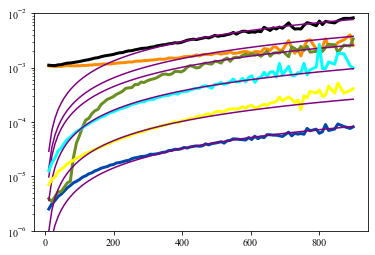

In [451]:
bins = np.linspace(0,900,100)
bins = np.append(bins,1000)


from scipy.optimize import curve_fit

def linear(x, A): # this is your 'straight line' y=f(x)
    return A*x

def poww(x, A, B, C): # this is your 'straight line' y=f(x)
    return A*x*np.log(x)


# def poww(x, A,B,C): # this is your 'straight line' y=f(x)
#     return B*x**A +C

def log(x, A): # this is your 'straight line' y=f(x)
    return A*np.log(x)

def expp(x, A,B): # this is your 'straight line' y=f(x)
    return B*A**x

# popt, pcov = curve_fit(linear, bins[:-1][~nans[:]],bin_means[:][~nans[:]]) # your data x, y to fit
# print('Line, ', popt)
# plt.plot(bins[:-1][~nans],linear(bins[:-1][~nans], popt[0]))

# popt, pcov = curve_fit(quad, bins[:-1][~nans[:]],bin_means[:][~nans[:]]) # your data x, y to fit
# print('Quad, ' ,popt)
# plt.plot(bins[:-1][~nans],quad(bins[:-1][~nans], popt[0]), c= 'g')

# # popt, pcov = curve_fit(log, bins[1:-1][~nans[1:]],bin_means[1:][~nans[1:]]) # your data x, y to fit
# # print('log, ' ,popt)
# # plt.plot(bins[:-1][~nans],log(bins[:-1][~nans], popt[0]), c= 'r')

# popt, pcov = curve_fit(expp, bins[:-1][~nans[:]],bin_means[:][~nans[:]]) # your data x, y to fit
# print('exp, ' ,popt)
# plt.plot(bins[:-1][~nans],expp(bins[:-1][~nans], popt[0],popt[1]), c= 'y')

# 
ldown = 0
lup = -30
bins = np.linspace(10,900,100)
bins = np.append(bins,1000)
bin_means, bin_edges, binnumber  = binned_statistic(allhits, allfilltime, statistic=np.nanmedian, bins = bins)
bin_means = bin_means[:]
bins = bins[:]
# bins = bins - bins[0]

# bin_means = bin_means - bin_means[0]
nans, x= nan_helper(bin_means)

plt.plot(bins[:-1][~nans], bin_means[~nans],   color=CTW, marker = '', lw=lw,      label='CBAB')

poptfill, pcov = curve_fit(poww, bins[ldown:lup-1][~nans[ldown:lup]],bin_means[ldown:lup][~nans[ldown:lup]]) # your data x, y to fit
print('poww, ' ,poptfill)
plt.plot(bins[:-1][~nans],poww(bins[:-1][~nans], poptfill[0],poptfill[1], poptfill[2]), c= 'purple')

fill = lambda a : (poptfill[1])*(a)**poptfill[0]+poptfill[2]
# fill = lambda a : (poptfill[1])*(a) +poptfill[0]*a**2+poptfill[2]

# 
bins = np.linspace(10,900,100)
bins = np.append(bins,1000)
bin_means, bin_edges, binnumber  = binned_statistic(allhits, allcontime, statistic=np.nanmedian, bins = bins)
bin_means = bin_means[:]
bins = bins[:]
# bins = bins - bins[0]

# bin_means = bin_means - bin_means[0]
nans, x= nan_helper(bin_means)

plt.plot(bins[:-1][~nans], bin_means[~nans],   color=CBAB, marker = '', lw=lw,      label='CBAB')

poptcon, pcov = curve_fit(poww, bins[ldown:lup-1][~nans[ldown:lup]],bin_means[ldown:lup][~nans[ldown:lup]]) # your data x, y to fit
print('poww, ' ,poptcon)
plt.plot(bins[:-1][~nans],poww(bins[:-1][~nans], poptcon[0],poptcon[1], poptcon[2]), c= 'purple')
con = lambda a : (poptcon[1])*(a)**poptcon[0]+poptcon[2]
# con = lambda a : (poptcon[1])*(a) +poptcon[0]*a**2+poptcon[2]


bins = np.linspace(10,900,100)
bins = np.append(bins,1000)
bin_means, bin_edges, binnumber  = binned_statistic(allhits, allfittime, statistic=np.nanmedian, bins = bins)
bin_means = bin_means[:]
bins = bins[:]
# bins = bins - bins[0]

# bin_means = bin_means - bin_means[0]
nans, x= nan_helper(bin_means)

plt.plot(bins[:-1][~nans], bin_means[~nans],   color=CCOMP, marker = '', lw=lw,      label='CBAB')
limdownf = 10
limupf = -15
poptfit, pcov = curve_fit(poww, bins[limdownf:limupf-1][~nans[limdownf:limupf]],
                          bin_means[limdownf:limupf][~nans[limdownf:limupf]], # your data x, y to fit
                      bounds=(0, [3., 10., 10])) # your data x, y to fit
print('poww, ' ,poptfit)
plt.plot(bins[:-1][~nans],poww(bins[:-1][~nans], poptfit[0],poptfit[1], poptfit[2]), c= 'purple')
fit = lambda a : (poptfit[1])*(a)**poptfit[0]+poptfit[2]
# fit = lambda a : (poptfit[1])*(a) +poptfit[0]*a**2+poptfit[2]



bins = np.linspace(10,900,100)
bins = np.append(bins,1000)
bin_means, bin_edges, binnumber  = binned_statistic(allhits, allmergtime, statistic=np.nanmedian, bins = bins)
bin_means = bin_means[:]
bins = bins[:]
# bins = bins - bins[0]

# bin_means = bin_means - bin_means[0]
nans, x= nan_helper(bin_means)

plt.plot(bins[:-1][~nans], bin_means[~nans],   color='cyan', marker = '', lw=lw,      label='CBAB')

poptmerg, pcov = curve_fit(poww, bins[ldown:lup-1][~nans[ldown:lup]],bin_means[ldown:lup][~nans[ldown:lup]]) # your data x, y to fit
print('poww, ' ,poptmerg)
plt.plot(bins[:-1][~nans],poww(bins[:-1][~nans],poptmerg[0],poptmerg[1], poptmerg[2]), c= 'purple')

merg = lambda a : (poptmerg[1])*(a)**poptmerg[0]+poptmerg[2]
# merg = lambda a : (poptmerg[1])*(a) +poptmerg[0]*a**2+poptmerg[2]

bins = np.linspace(10,900,100)
bins = np.append(bins,1000)
bin_means, bin_edges, binnumber  = binned_statistic(allhits, allztime, statistic=np.nanmedian, bins = bins)
bin_means = bin_means[:]
bins = bins[:]
# bins = bins - bins[0]

# bin_means = bin_means - bin_means[0]
nans, x= nan_helper(bin_means)
lup = -55

plt.plot(bins[:-1][~nans], bin_means[~nans],   color='yellow', marker = '', lw=lw,      label='CBAB')

poptz, pcov = curve_fit(poww, bins[ldown:lup-1][~nans[ldown:lup]],bin_means[ldown:lup][~nans[ldown:lup]],
                       p0 = [1.5, 6e-8, 8e-6]) # your data x, y to fit
print('poww, ' ,poptz)
plt.plot(bins[:-1][~nans],poww(bins[:-1][~nans], poptz[0],poptz[1], poptz[2]), c= 'purple')
z = lambda a : (poptz[1])*(a)**poptz[0]+poptz[2]
# z = lambda a : (poptz[1])*(a) +poptz[0]*a**2+poptz[2]


bins = np.linspace(10,900,100)
bins = np.append(bins,1000)
bin_means, bin_edges, binnumber  = binned_statistic(allhits, tottime, statistic=np.nanmedian, bins = bins)
bin_means = bin_means[:]
bins = bins[:]
# bins = bins - bins[0]

# bin_means = bin_means - bin_means[0]
nans, x= nan_helper(bin_means)

plt.plot(bins[:-1][~nans], bin_means[~nans],   color='k', marker = '', lw=lw,      label='Total')
# ldown+=15
lup=-30
popttot, pcov = curve_fit(poww, bins[ldown:lup-1][~nans[ldown:lup]],bin_means[ldown:lup][~nans[ldown:lup]]
                                         ) # your data x, y to fit
 # your data x, y to fit
print('poww, ' ,popttot)
plt.plot(bins[:-1][~nans],poww(bins[:-1][~nans], popttot[0],popttot[1], popttot[2]), c= 'purple')

tot = lambda a : (popttot[1])*(a)**popttot[0]+popttot[2]
# tot = lambda a : (popttot[1])*(a) +popttot[0]*a**2+popttot[2]

plt.ylim(1e-6, 1e-2)


plt.yscale('log')

Reconstruction rate hits 63212.627625877525
Reconstruction rate trks 3113.633944721637
np.mean(allhits/tottime) 21.571428571428573
Mean hit per event 91.94116666666666
275.05454545454546 91.37293333333334
0.9062626262626262


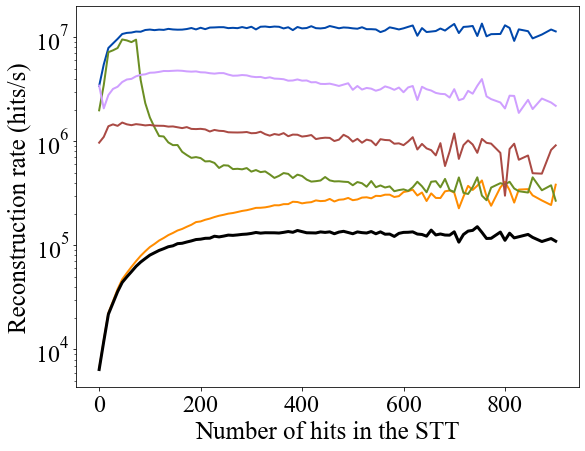

In [41]:


lw = 3

col = 'hits'
allhits = np.concatenate((timeB15evt1[col],timeB3evt1[col],timeB3evt4[col]))

col = 'trks'
alltrks = np.concatenate((timeB15evt1[col],timeB3evt1[col],timeB3evt4[col]))

col = 'filltime'
allfilltime = np.concatenate((timeB15evt1[col],timeB3evt1[col],timeB3evt4[col]))

col = 'contime'
allcontime = np.concatenate((timeB15evt1[col],timeB3evt1[col],timeB3evt4[col]))

col = 'fittime'
allfittime = np.concatenate((timeB15evt1[col],timeB3evt1[col],timeB3evt4[col]))

col = 'mergtime'
allmergtime = np.concatenate((timeB15evt1[col],timeB3evt1[col],timeB3evt4[col]))

col = 'ztime'
allztime = np.concatenate((timeB15evt1[col],timeB3evt1[col],timeB3evt4[col]))
# print sum(allmergtime>0.5)
# print len(allmergtime)
tottime = allfilltime + allcontime + allfittime + allmergtime +allztime
# print sum(allhits>1200)
# plt.scatter(allhits, allfilltime)
# plt.scatter(allhits, allcontime)
# plt.scatter(allhits, allfittime)
# plt.scatter(allhits, allmergtime)
# plt.scatter(allhits, allztime)
# plt.scatter(allhits, tottime)

bins = np.linspace(0,900,100)
bins = np.append(bins,1000)
# bins = np.append(bins,1200)
# print allhits[allhits>800], tottime[allhits>800]
# print bins
plt.figure(figsize = (9,7))
# bmap = brewer2mpl.get_map('Dark2', 'Qualitative', 5)
# colors = bmap.mpl_colors

ax = plt.gca()
ax.set_yscale('log')
#ax2=ax.twinx()

# def timetorate(x):
#     return x * 1.8 + 32


# def FtoC(x):
#     return (x - 32) / 1.8

# secaxy = ax.secondary_yaxis('right', functions=(CtoF, FtoC))
# secaxy.set_ylabel(r'$T\ [^oF]$')


bin_means, bin_edges, binnumber  = binned_statistic(allhits, 1.*allhits/allfilltime,  statistic=np.median, bins = bins)
bins =bin_edges
nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
plt.plot(bins[:-1][~nans], bin_means[~nans],  color=CTW ,marker = '', lw=lw-1,      label='Filling graph')
# ax2.plot(bins[:-1][~nans], bins[:-1][~nans]*1/bin_means[~nans],color="blue",marker="o")
# ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)

bin_means, bin_edges, binnumber  = binned_statistic(allhits,1.*allhits/allcontime,  statistic=np.median, bins = bins)
# nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
plt.plot(bins[:-1][~nans], bin_means[~nans],   color=CBAB, marker = '',lw=lw-1,      label='Connect')

bin_means, bin_edges, binnumber  = binned_statistic(allhits,1.*allhits/allfittime, statistic=np.median, bins = bins)
# nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
plt.plot(bins[:-1][~nans], bin_means[~nans],   color=CCOMP, marker = '',lw=lw-1,      label='Fitting')

bin_means, bin_edges, binnumber  = binned_statistic(allhits,1.*allhits/allmergtime,  statistic=np.median, bins = bins)
# nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
plt.plot(bins[:-1][~nans], bin_means[~nans],   color='#AA4A44', marker = '',lw=lw-1,      label='Merging')

bin_means, bin_edges, binnumber  = binned_statistic(allhits,1.*allhits/allztime, statistic=np.median, bins = bins)
# nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
plt.plot(bins[:-1][~nans], bin_means[~nans],   color='#CF9FFF', marker = '',lw=lw-1,      label='z-reconstruction')

bin_means, bin_edges, binnumber  = binned_statistic(allhits,1.*allhits/tottime,  statistic=np.nanmedian, bins = bins)
#print binnumber
#print bin_means
# nans, x= nan_helper(bin_means)
# bin_means[nans]= np.interp(x(nans), x(~nans), bin_means[~nans])
plt.plot(bins[:-1][~nans], bin_means[~nans],   color='k', marker = '', lw=lw,      label='Total')

# make a plot with different y-axis using second axis object



#plt.legend(fontsize = 20, ncol=2, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.ylabel('Reconstruction rate (hits/s)', fontsize = 25)
plt.xlabel('Number of hits in the STT', fontsize = 25)
print('Reconstruction rate hits', np.median((allhits/tottime)))
print('Reconstruction rate trks', np.mean(alltrks/tottime))
print('N hits per track', np.median(allhits/alltrks))

print('Mean hit per event', np.mean(allhits[:30000]))
print(np.mean(timeB3evt4['hits']) , np.mean(timeB3evt1['hits']) ) 
print(1.*sum(timeB3evt4['hits']<470)/ len(timeB3evt4['hits']))

# plt.savefig('PaperW/Allhitsrate.pdf', bbox_inches='tight')

# m,b = np.polyfit(timeB3['hits'], timeB3['rtime'], 1)

# hitsptime = timeB3['hits']/timeB3['rtime']
# #sns.violinplot(x="hits", y="rtime", data=timeB3,  dodge=True,palette='Set1'),#fliersize=1,\
# #                 linewidth=2) 
# bins = np.linspace(0,1100,12)
# print(bins)
# bin_means, bin_edges, binnumber  = binned_statistic(timeB15['hits'], timeB15['rtime'], statistic=np.mean, bins = bins)
# m,b = np.polyfit(timeB3['hits'], timeB3['rtime'], 1)
# # = stats.binned_statistic(windspeed,
# #                 boatspeed, statistic='median', bins=[1,2,3,4,5,6,7])
# plt.figure()
# # plt.plot(windspeed, boatspeed, 'b.', label='raw data')
# plt.plot(bins[:-1], bin_means, color='g', lw=5,
#            label='binned statistic of data')
# plt.legend()
# # bin_means, bin_edges, binnumber  = binned_statistic(timeB3['hits'], timeB3['rtime'], statistic=np.std)
# # plt.plot(bin_means,  colors='b', lw=5,
# #            label='binned statistic of data')

# x = np.linspace(0,1000)
# plt.plot(x, m*x+b)
# plt.plot(x, 1/4000.*x)

# print(m, b)


In [67]:
print(sum(timeB3evt1['trks']))
print(sum(timeB15evt1['trks']))

56190
68052


In [69]:
print(np.mean(tottime[:15000]),np.mean(tottime[15000:30000]),np.mean(tottime[30000:]))

(0.0025547701166666664, 0.0023473006063999997, 0.0037837282230303035)


## Comparison to Babai+20

In [15]:
# FOR COMP Babai 

f = TFile.Open("Result_files/Tracks_outputBabai_Beam3.root")
ErrorBB = f.Get("ErrorEstimate")
ErrTrackBB = f.Get("PerTrackError")
CurvTrackBB = f.Get("PerTrackCurv")
DisTrackBB = f.Get("DisPerTrackError")
UndermerBB = ErrorBB.AsMatrix(["Error_underMergeNorm"])
#UndermerBB =UndermerBB[~np.isnan(UndermerBB)]
OvermerBB = ErrorBB.AsMatrix(["Error_overMergeNorm"])
TotBB = ErrorBB.AsMatrix(["TotalErrorNorm"])
#print TotBB
#TotBB =TotBB[~np.isnan(TotBB)]
# print len(UndermerBB)

# JacBB = ErrTrackBB.AsMatrix(["Jacardsingle"])
# F1BB = ErrTrackBB.AsMatrix(["Jacardaverage"])
disxBB = ErrTrackBB.AsMatrix(["disX"])
disyBB = ErrTrackBB.AsMatrix(["disY"])
diszBB = ErrTrackBB.AsMatrix(["disZ"])
diszBB = diszBB[diszBB < 180]
compBB = ErrTrackBB.AsMatrix(["complex"])

alldisxBB = DisTrackBB.AsMatrix(["disx"])
alldisyBB = DisTrackBB.AsMatrix(["disy"])
alldiszBB = DisTrackBB.AsMatrix(["disz"])
alldiszBB = alldiszBB[alldiszBB < 180]

MCrBB = CurvTrackBB.AsMatrix(["MC_r"])
trkrBB = CurvTrackBB.AsMatrix(["tr_r"])

ErrRecoTrackBabB3  = f.Get("PerRecoTrackError")
RankBabB3          = ErrRecoTrackBabB3.AsMatrix(["Rank"])


f = TFile.Open("Result_files/Tracks_outputBabai_Beam15.root")
ErrorBB15 = f.Get("ErrorEstimate")
ErrTrackBB15 = f.Get("PerTrackError")
CurvTrackBB15 = f.Get("PerTrackCurv")
DisTrackBB15 = f.Get("DisPerTrackError")
UndermerBB15 = ErrorBB15.AsMatrix(["Error_underMergeNorm"])
#UndermerBB =UndermerBB[~np.isnan(UndermerBB)]
OvermerBB15 = ErrorBB15.AsMatrix(["Error_overMergeNorm"])
TotBB15 = ErrorBB15.AsMatrix(["TotalErrorNorm"])
#print TotBB
#TotBB =TotBB[~np.isnan(TotBB)]
# print len(UndermerBB15)

# JacBB15 = ErrTrackBB15.AsMatrix(["Jacardsingle"])
# F1BBB15 = ErrTrackBB15.AsMatrix(["Jacardaverage"])
disxBB15 = ErrTrackBB15.AsMatrix(["disX"])
disyBB15 = ErrTrackBB15.AsMatrix(["disY"])
diszBB15 = ErrTrackBB15.AsMatrix(["disZ"])
diszBB15 = diszBB15[diszBB15 < 180]
compBB15 = ErrTrackBB15.AsMatrix(["complex"])

alldisxBB15 = DisTrackBB15.AsMatrix(["disx"])
alldisyBB15 = DisTrackBB15.AsMatrix(["disy"])
alldiszBB15 = DisTrackBB15.AsMatrix(["disz"])
alldiszBB15 = alldiszBB15[alldiszBB15 < 180]

MCrBB15 = CurvTrackBB15.AsMatrix(["MC_r"])
trkrBB15 = CurvTrackBB15.AsMatrix(["tr_r"])

ErrRecoTrackBabB15  = f.Get("PerRecoTrackError")
RankBabB15          = ErrRecoTrackBabB15.AsMatrix(["Rank"])
print( len(diszBB), len(disxBB))

43866 50124


### F1 score comparison

60766
n B3 F1 = 0, TW 4736 (0.589128)
n B3 F1 = 1, TW 12276 (1.760000)
n B3 F1 = 0, TW 4736 (0.077938)
n B3 F1 = 1, TW 12276 (0.202021)
n B3 F1 = 0, TW 8039 (0.132294)
n B3 F1 = 1, TW 6975 (0.114785)


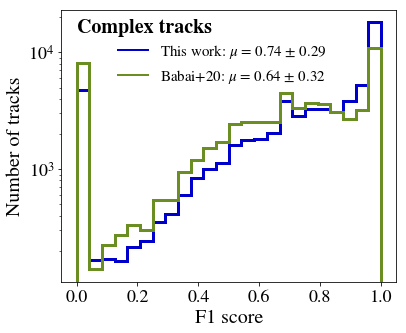

In [81]:
# Comp F1 overlapping 
bins = np.linspace(0, 1, 25)

valTW = F1B3[compB3==1]
valTW15 = F1B15[compB15==1]
valTW=np.concatenate((valTW, valTW15))
meanTW = np.nanmean(valTW)
stdTW = np.nanstd(valTW)

valBB = F1BB[compB3==1]
valBB15 = F1BBB15[compB15==1]
valBB=np.concatenate((valBB, valBB15))
meanBB = np.nanmean(valBB)
stdBB = np.nanstd(valBB)

print len(valTW)

custom_lines = [Line2D([0], [0], color=CTW, lw=2),
                Line2D([0], [0], color=CCOMP, lw=2)]

plt.figure(figsize=(6,5))
plt.hist(valTW, bins, color =CTW, \
label=r'This work- $\mu$ = %.2f $\pm$ %.2f'%(meanTW, stdTW),histtype=u'step',linewidth = 3)
plt.hist(valBB, bins, color=CCOMP,\
label=r'Babai+20 - $\mu$ = %.2f $\pm$ %.2f'%(meanBB, stdBB),histtype=u'step',linewidth = 3)
ax = plt.gca()
plt.yscale('log', nonposy='clip')
plt.legend(custom_lines, [r'This work: $\mu$ = %.2f $\pm$ %.2f'%(meanTW, stdTW),\
                          r'Babai+20: $\mu$ = %.2f $\pm$ %.2f'%(meanBB, stdBB)],
           loc=(0.15,0.7), fontsize = 15, frameon= False)
plt.xlabel('F1 score', fontsize = 20)
plt.ylabel('Number of tracks', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
plt.text(0,15000,r'Complex tracks', fontsize = 20, fontweight='bold')

plt.savefig('PaperW/F1comphard.pdf', bbox_inches='tight')

print 'n B3 F1 = 0, TW %d (%f)'%(np.sum(valTW== 0), np.sum(valTW== 0)/ (1.*(sum(valBB==0))))
print 'n B3 F1 = 1, TW %d (%f)'%(np.sum(valTW== 1),np.sum(valTW== 1)/ (1.*(sum(valBB==1))))
print 'n B3 F1 = 0, TW %d (%f)'%(np.sum(valTW== 0), np.sum(valTW== 0)/ (1.*(len(valTW))))
print 'n B3 F1 = 1, TW %d (%f)'%(np.sum(valTW== 1),np.sum(valTW== 1)/ (1.*(len(valTW))))
print 'n B3 F1 = 0, TW %d (%f)'%(np.sum(valBB== 0), np.sum(valBB== 0)/ (1.*(len(valBB))))
print 'n B3 F1 = 1, TW %d (%f)'%(np.sum(valBB== 1),np.sum(valBB== 1)/ (1.*(len(valBB))))


### Z analysis comparison

([<matplotlib.axis.XTick at 0x7f8234df1100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

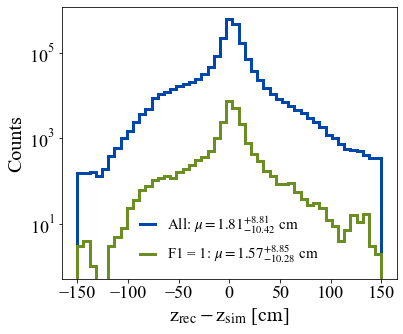

In [30]:
# Z plot comp with Babi

ftsize =13

allzTW = np.concatenate((alldiszB3, alldiszB15))
allzBB = np.concatenate((alldiszB3, alldiszB15))
allF1 = np.concatenate((RankB3, RankB15))

allCInt = np.concatenate((F1B3, F1B15))

# F1ZList = []
# CCInter = np.array(allCInt.astype('int32')).flatten()

# for trk in range(len(allF1)):
#     if(allF1[trk] == 1):
# #         print(RankB3[trk],allF1[trk])
#         offset = sum(CCInter[:trk])
#         nval = CCInter[trk]
#        # print nval
#         F1ZList.append(allzTW[offset:offset+nval])

outZ = np.concatenate(F1ZList).ravel()
 
name = 'PaperW/zCompPure'
xlabe =  r'z$_{\rm rec} - $z$_{\rm sim}$ [cm]'
binss = [np.linspace(-6, 6, 50),np.linspace(-6, 6, 50),np.linspace(-150, 150, 50)]
custom_lines = [Line2D([0], [0], color=CTW, lw=3),
                Line2D([0], [0], color=CCOMP, lw=3)]

valAll = allzTW[allzTW<=180]
meanAll = np.nanmedian(valAll)
stdAll = np.nanstd(valAll)
std84All = np.percentile(valAll,84) - meanAll # gives the 95th percentile
std16All = meanAll - np.percentile(valAll,16) # gives the 95th percentile

valBB = allzBB[allzBB<=180]
meanBB = np.nanmedian(valBB)
stdBB = np.nanstd(valBB)
std84BB = np.percentile(valBB,84) - meanBB # gives the 95th percentile
std16BB = meanBB - np.percentile(valBB,16) # gives the 95th percentile

valF1 = outZ[outZ<=180]
meanF1 = np.nanmedian(valF1)
stdF1 = np.nanstd(valF1)
std84F1 = np.percentile(valF1,84) - meanAll # gives the 95th percentile
std16F1 = meanAll - np.percentile(valF1,16) # gives the 95th percentile



plt.figure(figsize=(6,5))
plt.hist(valAll, np.linspace(-150, 150, 50), color =[CTW], histtype=u'step',linewidth =3 )
plt.hist(outZ, np.linspace(-150, 150, 50), color =[CCOMP], histtype=u'step',linewidth = 3)

ax = plt.gca()

plt.legend(custom_lines, ['All: $\mu = %.2f^{+%.2f}_{-%.2f}$ cm'%(meanAll, std84All,std16All),
                          'F1 = 1: $\mu = %.2f^{+%.2f}_{-%.2f}$ cm'%(meanF1, std84F1,std16F1)],
               loc='lower center', fontsize = 15, title = '',frameon=False, handlelength=1)
plt.setp(ax.get_legend().get_title(), fontsize='13') # for legend title

plt.xlabel(xlabe, fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.yscale('log')
plt.xticks([-150,-100,-50,0,50,100,150])
# plt.savefig(name+'.pdf', bbox_inches='tight')
    ##plt.axvline(-20)

# print sum(abs(valAll)<3)/(1.*len(valAll))
# print sum(abs(valBB)<3)/(1.*len(valBB))
# print sum(abs(valAll)<10)/(1.*len(valAll))
# print sum(abs(valBB)<10)/(1.*len(valBB))

([<matplotlib.axis.XTick at 0x7f4adfd80a90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

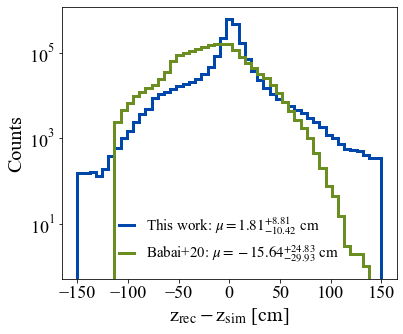

In [17]:
# Z plot comp with Babi

ftsize =13

allzTW = np.concatenate((alldiszB3, alldiszB15))
allzBB = np.concatenate((alldiszBB, alldiszBB15))

allCInt = np.concatenate((CCIntlengthB3, CCIntlengthB15))

# F1ZList = []
CCInter = np.array(allCInt.astype('int32')).flatten()

# for trk in range(len(allF1)):
#     if(allF1[trk] == 1):
#         offset = sum(CCInter[:trk])
#         nval = CCInter[trk]
#        # print nval
#         F1ZList.append(allzTW[offset:offset+nval])

#outZ = np.concatenate(F1ZList).ravel()
 
name = 'PaperW/zCompBab'
xlabe =  r'z$_{\rm rec} - $z$_{\rm sim}$ [cm]'
binss = [np.linspace(-6, 6, 50),np.linspace(-6, 6, 50),np.linspace(-150, 150, 50)]
custom_lines = [Line2D([0], [0], color=CTW, lw=3),
                Line2D([0], [0], color=CCOMP, lw=3)]

valAll = allzTW[allzTW<=180]
meanAll = np.nanmedian(valAll)
stdAll = np.nanstd(valAll)
std84All = np.percentile(valAll,84) - meanAll # gives the 95th percentile
std16All = meanAll - np.percentile(valAll,16) # gives the 95th percentile

valBB = allzBB[allzBB<=180]
meanBB = np.nanmedian(valBB)
stdBB = np.nanstd(valBB)
std84BB = np.percentile(valBB,84) - meanBB # gives the 95th percentile
std16BB = meanBB - np.percentile(valBB,16) # gives the 95th percentile




plt.figure(figsize=(6,5))
plt.hist(valAll, np.linspace(-150, 150, 50), color =[CTW], histtype=u'step',linewidth =3 )
plt.hist(valBB, np.linspace(-150, 150, 50), color =[CCOMP], histtype=u'step',linewidth = 3)

ax = plt.gca()

plt.legend(custom_lines, ['This work: $\mu = %.2f^{+%.2f}_{-%.2f}$ cm'%(meanAll, std84All,std16All),
                          'Babai+20: $\mu = %.2f^{+%.2f}_{-%.2f}$ cm'%(meanBB, std84BB,std16BB)],
               loc='lower center', fontsize = 15, title = '',frameon=False, handlelength = 1)
plt.setp(ax.get_legend().get_title(), fontsize='13') # for legend title

plt.xlabel(xlabe, fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.yscale('log')
plt.xticks([-150,-100,-50,0,50,100,150])
# plt.savefig(name+'.pdf', bbox_inches='tight')
    ##plt.axvline(-20)

# print sum(abs(valAll)<3)/(1.*len(valAll))
# print sum(abs(valBB)<3)/(1.*len(valBB))
# print sum(abs(valAll)<10)/(1.*len(valAll))

# print sum(abs(valBB)<10)/(1.*len(valBB))

In [37]:
print(len(valAll[abs(valAll)>110])/len(valAll), len(valAll))
print(len(valBB[abs(valBB)>110])/len(valBB), len(valBB))
print(len(meanDiszB15[abs(meanDiszB15)>110]))
print(len(diszBB15[abs(diszBB15)>110]))
print(len(meanDiszB3[abs(meanDiszB3)>110]))
print(len(diszBB[abs(diszBB)>110]))

0.0022882501645951963 1989730
6.098707018669251e-06 1803661
43
0
34
1


## QA Pandaroot metric

In [8]:
#F1 score Beam 3 + Beam 15
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xticks
    plt.xlim(bins[0], bins[-1])
    
    
bins = np.linspace(1, 7, 7)
#plt.scatter(F1TW, )
valTW = RankB3
valTW15 = RankB15



plt.style.use('seaborn-deep')

plt.figure(figsize=(6,5))
plt.hist([valTW, valTW15], bins, color =[CTW, CBAB],linewidth = 1, 
         label=[r'3 GeV/$c$', r'15 GeV/$c$'], edgecolor='k')
bins_labels(bins, fontsize=20)
plt.xticks(rotation=45, ha='right')
ax= plt.gca()
ax.set_xticklabels(['Fully Pure', ' Fully Impure', 'Partially Pure', 'Partially Impure', 'Ghosts', 'Clones'])
plt.yscale('log', nonposy='clip')
plt.legend(frameon = False, fontsize = 15)
plt.ylabel('Number of tracks', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(1000,100000)

ax.annotate('', xy=(0.33, 0.85), xytext=(0.33, 0.855), xycoords='axes fraction', 
            fontsize=15, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=6.0, lengthB=0.7, angleB=0', lw=2.0))

effB3 = np.sum((valTW != 5)&(valTW!=6))/ (1.*(len(valTW== 1)))
effB15 = np.sum((valTW15 != 5)&(valTW15!=6))/ (1.*(len(valTW15== 1)))

ax.text(0.16, 0.865, r'%.0f%%'%(effB3*100), transform=ax.transAxes, fontsize = 20 ,color = CTW, weight='bold')
ax.text(0.42, 0.865, r'%.0f%%'%(effB15*100), transform=ax.transAxes, fontsize = 20 ,color = CBAB, weight='bold')

ax.annotate('', xy=(0.83, 0.65), xytext=(0.83, 0.655), xycoords='axes fraction', 
            fontsize=15, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=2.4, lengthB=0.7, angleB=0', lw=2.0))

effB3 = np.sum((valTW == 5)|(valTW==6))/ (1.*(len(valTW== 1)))
effB15 = np.sum((valTW15 == 5)|(valTW15==6))/ (1.*(len(valTW15== 1)))

ax.text(0.72, 0.665, r'%.0f%%'%(effB3*100), transform=ax.transAxes, fontsize = 20 ,color = CTW, weight='bold')
ax.text(0.84, 0.665, r'%.0f%%'%(effB15*100), transform=ax.transAxes, fontsize = 20 ,color = CBAB, weight='bold')

print 'n B3 Rank = 1, TW %d (%f)'%(np.sum(valTW== 1), np.sum(valTW== 1)/ (1.*(len(valTW== 1))))
print 'n B3 Rank = 2, TW %d (%f)'%(np.sum(valTW== 2),np.sum(valTW== 2)/ (1.*(len(valTW== 2))))
print 'n B3 Rank = 3, TW %d (%f)'%(np.sum(valTW== 3),np.sum(valTW== 3)/ (1.*(len(valTW== 3))))
print 'n B3 Rank = 4, TW %d (%f)'%(np.sum(valTW== 4),np.sum(valTW== 4)/ (1.*(len(valTW== 4))))
print 'n B3 Rank = 5, TW %d (%f)'%(np.sum(valTW== 5),np.sum(valTW== 5)/ (1.*(len(valTW== 5))))
print 'n B3 Rank = 6, TW %d (%f)'%(np.sum(valTW== 6),np.sum(valTW== 6)/ (1.*(len(valTW== 6))))

print 'n B15 Rank = 1, TW %d (%f)'%(np.sum(valTW15== 1), np.sum(valTW15== 1)/ (1.*(len(valTW15== 1))))
print 'n B15 Rank = 2, TW %d (%f)'%(np.sum(valTW15== 2),np.sum(valTW15== 2)/ (1.*(len(valTW15== 2))))
print 'n B15 Rank = 3, TW %d (%f)'%(np.sum(valTW15== 3),np.sum(valTW15== 3)/ (1.*(len(valTW15== 3))))
print 'n B15 Rank = 4, TW %d (%f)'%(np.sum(valTW15== 4),np.sum(valTW15== 4)/ (1.*(len(valTW15== 4))))
print 'n B15 Rank = 5, TW %d (%f)'%(np.sum(valTW15== 5),np.sum(valTW15== 5)/ (1.*(len(valTW15== 5))))
print 'n B15 Rank = 6, TW %d (%f)'%(np.sum(valTW15== 6),np.sum(valTW15== 6)/ (1.*(len(valTW15== 6))))
#plt.savefig('PaperW/F1Simp.pdf', bbox_inches='tight')




SyntaxError: invalid syntax (1958012973.py, line 51)

## Comparison Babai + BarrelFinder

[1. 2. 3. 4. 5. 6. 7.]
[1. 2. 3. 4. 5. 6.]
[0.60922792 0.07572455 0.07871551 0.23633202 0.12930675 0.23171806]
[0.41769547 0.0489117  0.22487481 0.30851802 0.16535277 0.29401557]
[0.22156216 0.         0.41211267 0.36632517 0.19311803 0.26354872]
[26276  3266  3395 10193]


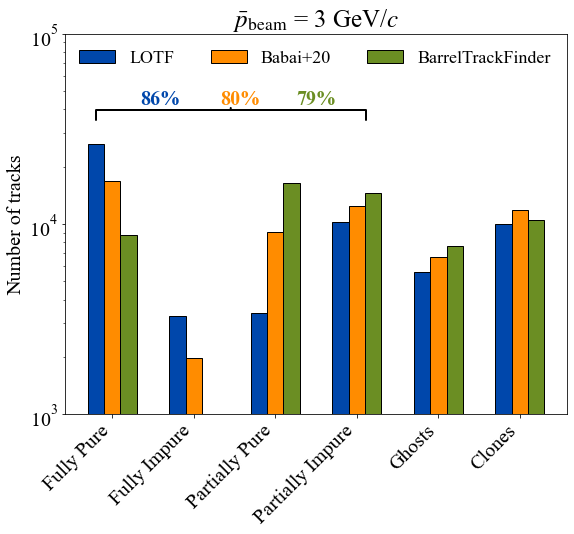

In [37]:
# Pbeam3
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xticks
    plt.xlim(bins[0], bins[-1])
    
    
bins = np.linspace(1, 7, 7)
print(bins)
print(np.unique(RankB3))
#plt.scatter(F1TW, )
valTW, edges = np.histogram(RankB3, bins=bins)
left_edges = edges[:-1]
width = 0.85*(left_edges[1] - left_edges[0])
# print(valTW)
valBab, edges = np.histogram(RankBabB3, bins=bins)
# valTW = RankB3
# valTW15 = RankB15

valBar = np.array([8802,0,16372, 14553, 7672, 10470])
# print(valTW, valTW/np.sum(valTW), np.sum(valTW), 50124-np.sum(valTW[:4]))
# print(valBab, valBab/np.sum(valBab), np.sum(valBab), 50124-np.sum(valBab[:4]))
# print(valBar, valBar/np.sum(valBar), np.sum(valBar), 50124-np.sum(valBar[:4]))
print(valTW/np.sum(valTW[:4]))
print(valBab/np.sum(valBab[:4]))
print(valBar/np.sum(valBar[:4]))
#label=[r'3 GeV/$c$', r'15 GeV/$c$']
plt.style.use('seaborn-deep')

plt.figure(figsize=(9,7))
# plt.bar([valTW, valBab, valBarB3], bins, color =[CTW, CBAB, CCOMP],linewidth = 1, 
#          label=[r'LOTF', r'Babai+20', r'BarrelTrackFinder'], edgecolor='k')
plt.bar(left_edges-0.2, valTW, color =CTW,  label=r'LOTF', edgecolor='k', width = 0.2),# color =CTW,  label=r'LOTF', edgecolor='k')
plt.bar(left_edges, valBab, color = CBAB, width = 0.2,
         label=r'Babai+20', edgecolor='k')
plt.bar(left_edges+0.2, valBar, color = CCOMP, width = 0.2,
         label=r'BarrelTrackFinder', edgecolor='k')
# bins_labels(bins, fontsize=20)
plt.xticks([1,2,3,4,5,6])
plt.xticks(rotation=45, ha='right')
ax= plt.gca()
ax.set_xticklabels(['Fully Pure', ' Fully Impure', 'Partially Pure', 'Partially Impure', 'Ghosts', 'Clones'])
plt.yscale('log')
plt.legend(frameon = False, fontsize = 18, ncol = 3)
plt.ylabel('Number of tracks', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(1000,100000)

ax.annotate('', xy=(0.33, 0.8), xytext=(0.33, 0.805), xycoords='axes fraction', 
            fontsize=15, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=9.0, lengthB=0.7, angleB=0', lw=2.0))
print(valTW[:4])
# effTW = np.sum(valTW[:4])/50124 
# effBab = np.sum(valBab[:4])/50124
# effBar = np.sum(valBar[:4])/50124

effTW = np.sum(valTW[:4])/50124#np.sum(valTW) 
effBab = np.sum(valBab[:4])/50124#np.sum(valBab)
effBar = np.sum(valBar[:4])/50124#np.sum(valBar)
ax.text(0.15, 0.815, r'%.0f%%'%(effTW*100), transform=ax.transAxes, fontsize = 20 ,color = CTW, weight='bold')
ax.text(0.31, 0.815, r'%.0f%%'%(effBab*100), transform=ax.transAxes, fontsize = 20 ,color = CBAB, weight='bold')
ax.text(0.46, 0.815, r'%.0f%%'%(effBar*100), transform=ax.transAxes, fontsize = 20 ,color = CCOMP, weight='bold')
plt.title(r'$\bar{p}_{\rm beam}$ = 3 GeV/$c$',fontsize = 25)
# ax.annotate('', xy=(0.83, 0.65), xytext=(0.83, 0.655), xycoords='axes fraction', 
#             fontsize=15, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='-[, widthB=2.4, lengthB=0.7, angleB=0', lw=2.0))

# effB3 = np.sum((valTW == 5)|(valTW==6))/ (1.*(len(valTW== 1)))
# effB15 = np.sum((valTW15 == 5)|(valTW15==6))/ (1.*(len(valTW15== 1)))

# ax.text(0.72, 0.665, r'%.0f%%'%(effB3*100), transform=ax.transAxes, fontsize = 20 ,color = CTW, weight='bold')
# ax.text(0.84, 0.665, r'%.0f%%'%(effB15*100), transform=ax.transAxes, fontsize = 20 ,color = CBAB, weight='bold')

# print 'n B3 Rank = 1, TW %d (%f)'%(np.sum(valTW== 1), np.sum(valTW== 1)/ (1.*(len(valTW== 1))))
# print 'n B3 Rank = 2, TW %d (%f)'%(np.sum(valTW== 2),np.sum(valTW== 2)/ (1.*(len(valTW== 2))))
# print 'n B3 Rank = 3, TW %d (%f)'%(np.sum(valTW== 3),np.sum(valTW== 3)/ (1.*(len(valTW== 3))))
# print 'n B3 Rank = 4, TW %d (%f)'%(np.sum(valTW== 4),np.sum(valTW== 4)/ (1.*(len(valTW== 4))))
# print 'n B3 Rank = 5, TW %d (%f)'%(np.sum(valTW== 5),np.sum(valTW== 5)/ (1.*(len(valTW== 5))))
# print 'n B3 Rank = 6, TW %d (%f)'%(np.sum(valTW== 6),np.sum(valTW== 6)/ (1.*(len(valTW== 6))))

# print 'n B15 Rank = 1, TW %d (%f)'%(np.sum(valTW15== 1), np.sum(valTW15== 1)/ (1.*(len(valTW15== 1))))
# print 'n B15 Rank = 2, TW %d (%f)'%(np.sum(valTW15== 2),np.sum(valTW15== 2)/ (1.*(len(valTW15== 2))))
# print 'n B15 Rank = 3, TW %d (%f)'%(np.sum(valTW15== 3),np.sum(valTW15== 3)/ (1.*(len(valTW15== 3))))
# print 'n B15 Rank = 4, TW %d (%f)'%(np.sum(valTW15== 4),np.sum(valTW15== 4)/ (1.*(len(valTW15== 4))))
# print 'n B15 Rank = 5, TW %d (%f)'%(np.sum(valTW15== 5),np.sum(valTW15== 5)/ (1.*(len(valTW15== 5))))
# print 'n B15 Rank = 6, TW %d (%f)'%(np.sum(valTW15== 6),np.sum(valTW15== 6)/ (1.*(len(valTW15== 6))))


plt.savefig('PaperW/PandaQA3GevV2.pdf', bbox_inches='tight')




[0.61685007 0.09285537 0.07175658 0.21853798 0.13923134 0.17387887]
[0.4130831  0.05690947 0.23668399 0.29332343 0.18170976 0.22257477]
[0.16772319 0.         0.40269949 0.42957733 0.31982289 0.27137256]


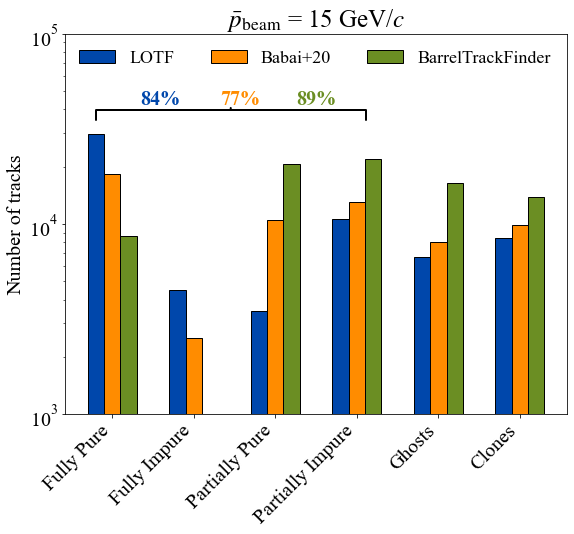

In [38]:
# Pbeam3
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xticks
    plt.xlim(bins[0], bins[-1])
    
    
bins = np.linspace(1, 7, 7)
#print(bins)
#print(np.unique(RankB3))
#plt.scatter(F1TW, )
valTW, edges = np.histogram(RankB15, bins=bins)
left_edges = edges[:-1]
width = 0.85*(left_edges[1] - left_edges[0])
valBab, edges = np.histogram(RankBabB15, bins=bins)
# valTW = RankB3
# valTW15 = RankB15
# valTW = np.insert(valTW, 0, 48334)
# valBab = np.insert(valBab,0, 44439)
valBar = [8599,0,20646, 22024, 16397, 13913]#51269, 
# print(valTW, valTW/np.sum(valTW), np.sum(valTW), 57481-np.sum(valTW[:4]))
# print(valBab, valBab/np.sum(valBab), np.sum(valBab), 57481-np.sum(valBab[:4]))
# print(valBar, valBar/np.sum(valBar), np.sum(valBar), 57481-np.sum(valBar[:4]))
print(valTW/np.sum(valTW[:4]))
print(valBab/np.sum(valBab[:4]))
print(valBar/np.sum(valBar[:4]))
#label=[r'3 GeV/$c$', r'15 GeV/$c$']
plt.style.use('seaborn-deep')

plt.figure(figsize=(9,7))
# plt.bar([valTW, valBab, valBarB3], bins, color =[CTW, CBAB, CCOMP],linewidth = 1, 
#          label=[r'LOTF', r'Babai+20', r'BarrelTrackFinder'], edgecolor='k')
plt.bar(left_edges-0.2, valTW, color =CTW,  label=r'LOTF', edgecolor='k', width = 0.2),# color =CTW,  label=r'LOTF', edgecolor='k')
plt.bar(left_edges, valBab, color = CBAB, width = 0.2,
         label=r'Babai+20', edgecolor='k')
plt.bar(left_edges+0.2, valBar, color = CCOMP, width = 0.2,
         label=r'BarrelTrackFinder', edgecolor='k')
# bins_labels(bins, fontsize=20)
plt.xticks([1,2,3,4,5,6])
plt.xticks(rotation=45, ha='right')
ax= plt.gca()
ax.set_xticklabels([ 'Fully Pure', ' Fully Impure', 'Partially Pure', 'Partially Impure', 'Ghosts', 'Clones'])
plt.yscale('log')
plt.legend(frameon = False, fontsize = 18, ncol = 3)
plt.ylabel('Number of tracks', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(1000,100000)

ax.annotate('', xy=(0.33, 0.8), xytext=(0.33, 0.805), xycoords='axes fraction', 
            fontsize=15, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=9.0, lengthB=0.7, angleB=0', lw=2.0))
# print(valTW[:4])
effTW = np.sum(valTW[:4])/57481 
effBab = np.sum(valBab[:4])/57481
effBar = np.sum(valBar[:4])/57481
# effTW = np.sum(valTW[:4])/np.sum(valTW) 
# effBab = np.sum(valBab[:4])/np.sum(valBab)
# effBar = np.sum(valBar[:4])/np.sum(valBar)
ax.text(0.15, 0.815, r'%.0f%%'%(effTW*100), transform=ax.transAxes, fontsize = 20 ,color = CTW, weight='bold')
ax.text(0.31, 0.815, r'%.0f%%'%(effBab*100), transform=ax.transAxes, fontsize = 20 ,color = CBAB, weight='bold')
ax.text(0.46, 0.815, r'%.0f%%'%(effBar*100), transform=ax.transAxes, fontsize = 20 ,color = CCOMP, weight='bold')
plt.title(r'$\bar{p}_{\rm beam}$ = 15 GeV/$c$',fontsize = 25)
# ax.annotate('', xy=(0.83, 0.65), xytext=(0.83, 0.655), xycoords='axes fraction', 
#             fontsize=15, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='-[, widthB=2.4, lengthB=0.7, angleB=0', lw=2.0))

# effB3 = np.sum((valTW == 5)|(valTW==6))/ (1.*(len(valTW== 1)))
# effB15 = np.sum((valTW15 == 5)|(valTW15==6))/ (1.*(len(valTW15== 1)))

# ax.text(0.72, 0.665, r'%.0f%%'%(effB3*100), transform=ax.transAxes, fontsize = 20 ,color = CTW, weight='bold')
# ax.text(0.84, 0.665, r'%.0f%%'%(effB15*100), transform=ax.transAxes, fontsize = 20 ,color = CBAB, weight='bold')

# print 'n B3 Rank = 1, TW %d (%f)'%(np.sum(valTW== 1), np.sum(valTW== 1)/ (1.*(len(valTW== 1))))
# print 'n B3 Rank = 2, TW %d (%f)'%(np.sum(valTW== 2),np.sum(valTW== 2)/ (1.*(len(valTW== 2))))
# print 'n B3 Rank = 3, TW %d (%f)'%(np.sum(valTW== 3),np.sum(valTW== 3)/ (1.*(len(valTW== 3))))
# print 'n B3 Rank = 4, TW %d (%f)'%(np.sum(valTW== 4),np.sum(valTW== 4)/ (1.*(len(valTW== 4))))
# print 'n B3 Rank = 5, TW %d (%f)'%(np.sum(valTW== 5),np.sum(valTW== 5)/ (1.*(len(valTW== 5))))
# print 'n B3 Rank = 6, TW %d (%f)'%(np.sum(valTW== 6),np.sum(valTW== 6)/ (1.*(len(valTW== 6))))

# print 'n B15 Rank = 1, TW %d (%f)'%(np.sum(valTW15== 1), np.sum(valTW15== 1)/ (1.*(len(valTW15== 1))))
# print 'n B15 Rank = 2, TW %d (%f)'%(np.sum(valTW15== 2),np.sum(valTW15== 2)/ (1.*(len(valTW15== 2))))
# print 'n B15 Rank = 3, TW %d (%f)'%(np.sum(valTW15== 3),np.sum(valTW15== 3)/ (1.*(len(valTW15== 3))))
# print 'n B15 Rank = 4, TW %d (%f)'%(np.sum(valTW15== 4),np.sum(valTW15== 4)/ (1.*(len(valTW15== 4))))
# print 'n B15 Rank = 5, TW %d (%f)'%(np.sum(valTW15== 5),np.sum(valTW15== 5)/ (1.*(len(valTW15== 5))))
# print 'n B15 Rank = 6, TW %d (%f)'%(np.sum(valTW15== 6),np.sum(valTW15== 6)/ (1.*(len(valTW15== 6))))
plt.savefig('PaperW/PandaQA15GevV2.pdf', bbox_inches='tight')




## Comparison with Event mixing

[1. 2. 3. 4. 5. 6. 7.]
[1. 2. 3. 4. 5. 6.]
[26276  3266  3395 10193  5577  9994]
[14027  4921  2294 15538 13959  8268]


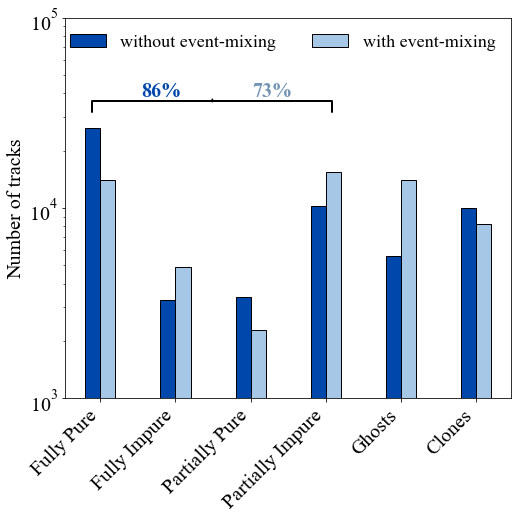

In [33]:
# 4 evts comparison
import matplotlib.patheffects as PathEffects


bins = np.linspace(0, 1, 25)
bins = np.linspace(1, 7, 7)

#plt.scatter(F1TW, )
meanF1Evt1 = np.nanmean(RankB3)
stdF1Evt1 = np.nanstd(RankB3)
meanF1Evt4 = np.nanmean(RankB3E4[:len(RankB3)])
stdF1Evt4 = np.nanstd(RankB3E4[:len(RankB3)])

bins = np.linspace(1, 7, 7)
print(bins)
print(np.unique(RankB3))
#plt.scatter(F1TW, )
valTW, edges = np.histogram(RankB3, bins=bins)
left_edges = edges[:-1]
width = 0.85*(left_edges[1] - left_edges[0])
valBab, edges = np.histogram(RankB3E4, bins=bins)
# valTW = RankB3
# valTW15 = RankB15
print(valTW)
print(valBab)

#label=[r'3 GeV/$c$', r'15 GeV/$c$']
plt.style.use('seaborn-deep')

plt.figure(figsize=(8,7))
# plt.bar([valTW, valBab, valBarB3], bins, color =[CTW, CBAB, CCOMP],linewidth = 1, 
#          label=[r'LOTF', r'Babai+20', r'BarrelTrackFinder'], edgecolor='k')
plt.bar(left_edges-0.1, valTW, color =CTW,  label=r'without event-mixing', edgecolor='k', width = 0.2),# color =CTW,  label=r'LOTF', edgecolor='k')
plt.bar(left_edges+0.1, valBab, color = '#A7C7E7', width = 0.2,
         label=r'with event-mixing', edgecolor='k')

# bins_labels(bins, fontsize=20)
plt.xticks([1,2,3,4,5,6])
plt.xticks(rotation=45, ha='right')
ax= plt.gca()
ax.set_xticklabels(['Fully Pure', ' Fully Impure', 'Partially Pure', 'Partially Impure', 'Ghosts', 'Clones'])
plt.yscale('log')
plt.legend(frameon = False, fontsize = 18, ncol = 3)
plt.ylabel('Number of tracks', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(1000,100000)

ax.annotate('', xy=(0.33, 0.78), xytext=(0.33, 0.785), xycoords='axes fraction', 
            fontsize=15, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=8, lengthB=0.7, angleB=0', lw=2.0))
# effTW = np.sum(valTW[:4])/57481 
# effBab = np.sum(valBab[:4])/57481
effTW = np.sum(valTW[:4])/50124 #sum(valTW) 
effBab = np.sum(valBab[:4])/50124 #sum(valBab)
ax.text(0.17, 0.795, r'%.0f%%'%(effTW*100), transform=ax.transAxes, fontsize = 20 ,color = CTW, weight='bold')
txt = ax.text(0.42, 0.795, r'%.0f%%'%(effBab*100), transform=ax.transAxes, fontsize = 20 ,color =  '#7393B3',
              weight='bold')
# txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='k')])

# ax.annotate('', xy=(0.83, 0.65), xytext=(0.83, 0.655), xycoords='axes fraction', 
#             fontsize=15, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='-[, widthB=3, lengthB=0.7, angleB=0', lw=2.0))

# effB3 = np.sum((valTW == 5)|(valTW==6))/ (1.*(len(valTW== 1)))
# effB15 = np.sum((RankB3E4 == 5)|(RankB3E4==6))/ (1.*(len(RankB3E4== 1)))

# ax.text(0.71, 0.665, r'%.0f%%'%(effB3*100), transform=ax.transAxes, fontsize = 20 ,color = CTW, weight='bold')
# ax.text(0.85, 0.665, r'%.0f%%'%(effB15*100), transform=ax.transAxes, fontsize = 20 ,color = CBAB, weight='bold')
# plt.title(r'$\bar{p}_{\rm beam}$ = 3 GeV/$c$',fontsize = 17)


# print 'n B3 Rank = 1, TW %d (%f)'%(np.sum(valTW== 1), np.sum(valTW== 1)/ (1.*(len(valTW== 1))))
# print 'n B3 Rank = 2, TW %d (%f)'%(np.sum(valTW== 2),np.sum(valTW== 2)/ (1.*(len(valTW== 2))))
# print 'n B3 Rank = 3, TW %d (%f)'%(np.sum(valTW== 3),np.sum(valTW== 3)/ (1.*(len(valTW== 3))))
# print 'n B3 Rank = 4, TW %d (%f)'%(np.sum(valTW== 4),np.sum(valTW== 4)/ (1.*(len(valTW== 4))))
# print 'n B3 Rank = 5, TW %d (%f)'%(np.sum(valTW== 5),np.sum(valTW== 5)/ (1.*(len(valTW== 5))))
# print 'n B3 Rank = 6, TW %d (%f)'%(np.sum(valTW== 6),np.sum(valTW== 6)/ (1.*(len(valTW== 6))))

# print 'n B3E4 Rank = 1, TW %d (%f)'%(np.sum(RankB3E4== 1), np.sum(RankB3E4== 1)/ (1.*(len(RankB3E4== 1))))
# print 'n B3E4 Rank = 2, TW %d (%f)'%(np.sum(RankB3E4== 2),np.sum(RankB3E4== 2)/ (1.*(len(RankB3E4== 2))))
# print 'n B3E4 Rank = 3, TW %d (%f)'%(np.sum(RankB3E4== 3),np.sum(RankB3E4== 3)/ (1.*(len(RankB3E4== 3))))
# print 'n B3E4 Rank = 4, TW %d (%f)'%(np.sum(RankB3E4== 4),np.sum(RankB3E4== 4)/ (1.*(len(RankB3E4== 4))))
# print 'n B3E4 Rank = 5, TW %d (%f)'%(np.sum(RankB3E4== 5),np.sum(RankB3E4== 5)/ (1.*(len(RankB3E4== 5))))
# print 'n B3E4 Rank = 6, TW %d (%f)'%(np.sum(RankB3E4== 6),np.sum(RankB3E4== 6)/ (1.*(len(RankB3E4== 6))))
plt.savefig('PaperW/PandaQAEvtMixV2.pdf', bbox_inches='tight')
